# **🧠 LSTM Zeitreihenprognose für Verkaufsdaten**

#

# Dieses Notebook führt Sie durch die Entwicklung eines LSTM-Modells zur Prognose täglicher Verkaufszahlen.


# **Notebook-Struktur:**

Installation & Imports - Alle benötigten Bibliotheken

1. Daten laden - Von Google Drive oder Beispieldaten

2. Datenvorbereitung - Filterung und Aggregation

3. Explorative Datenanalyse - Visualisierungen und Statistiken

4. LSTM-Datenaufbereitung - Sequenzerstellung und Skalierung

5. Modell-Definition - LSTM-Architektur

6. Training - Mit Callbacks für bessere Konvergenz

7. Evaluation - Metriken und Visualisierungen

8. Mehrstufige Vorhersage - Multi-step Forecasting

9. Interaktives Dashboard - Zum Experimentieren mit Parametern

10. Modell-Speicherung - Für spätere Verwendung

11. Modell-Speicherung - Für spätere Verwendung

12. Zusammenfassung - Kompletter Report mit Empfehlungen


#**1. Bibliotheken Importieren**


## installation und import


## importieren


In [1]:
# ============================================================
# IMPORTE MIT FEHLERBEHANDLUNG
# ============================================================
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Setze TensorFlow Log-Level
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Basis-Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Visualisierung
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

print("📦 Lade Basis-Bibliotheken...")

# TensorFlow/Keras mit Fehlerbehandlung
print("🤖 Lade TensorFlow/Keras...")
try:
    import tensorflow as tf
    print(f"✅ TensorFlow geladen: {tf.__version__}")
    
    # Versuche, Keras Version zu erhalten
    try:
        import keras
        keras_version = keras.__version__
    except (ImportError, AttributeError):
        try:
            keras_version = tf.keras.__version__
        except AttributeError:
            keras_version = tf.__version__  # In TF 2.x ist Keras integriert
    
    print(f"✅ Keras Version: {keras_version}")
    
    # Importiere Keras Komponenten
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential, Model, load_model
    from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU, Input
    from tensorflow.keras.optimizers import Adam, RMSprop
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
    from tensorflow.keras.regularizers import l1, l2
    
    print("✅ TensorFlow/Keras Komponenten geladen")
    
except Exception as e:
    print(f"❌ Fehler beim Laden von TensorFlow: {e}")
    print("🔧 Versuche alternative Lösung...")
    
    # Alternative: Installiere TensorFlow wenn nicht vorhanden
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow==2.15.0"])
    
    # Neu importieren
    import tensorflow as tf
    print(f"✅ TensorFlow nachinstalliert: {tf.__version__}")

# Scikit-learn für Preprocessing und Metriken
print("📊 Lade scikit-learn...")
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

print("✅ scikit-learn geladen")

# Darts für Time Series (optional)
print("📈 Lade Darts (Time Series Library)...")
try:
    from darts import TimeSeries
    from darts.models import RNNModel, TCNModel, NBEATSModel
    from darts.metrics import mae as darts_mae, rmse as darts_rmse, mape as darts_mape
    from darts.dataprocessing.transformers import Scaler as DartsScaler
    DARTS_AVAILABLE = True
    print("✅ Darts erfolgreich geladen")
except ImportError as e:
    print(f"⚠️ Darts nicht verfügbar: {e}")
    print("   Verwende alternative Time Series Methoden")
    DARTS_AVAILABLE = False

# Joblib für Model-Speicherung
import joblib
import pickle

# Fortschrittsanzeige
from tqdm.auto import tqdm

print("\n" + "="*60)
print("✅ ALLE IMPORTE ERFOLGREICH!")
print("="*60)

# System-Informationen
print(f"\n📊 System-Informationen:")
print(f"   Python Version: {sys.version.split()[0]}")
print(f"   TensorFlow Version: {tf.__version__}")
print(f"   NumPy Version: {np.__version__}")
print(f"   Pandas Version: {pd.__version__}")
print(f"   Darts verfügbar: {DARTS_AVAILABLE}")

# TensorFlow Geräte-Informationen
print(f"\n🔧 TensorFlow Geräte:")
devices = tf.config.list_physical_devices()
for device in devices:
    print(f"   • {device.device_type}: {device.name}")

# Erstelle eine einfache Test-Funktion für TensorFlow
def test_tensorflow():
    """Testet ob TensorFlow korrekt funktioniert"""
    print("\n🧪 Teste TensorFlow Funktionalität...")
    
    try:
        # Einfacher TensorFlow Test
        a = tf.constant([[1, 2], [3, 4]])
        b = tf.constant([[5, 6], [7, 8]])
        c = tf.matmul(a, b)
        
        print(f"✅ TensorFlow Matrix-Multiplikation funktioniert:")
        print(f"   a = {a.numpy().tolist()}")
        print(f"   b = {b.numpy().tolist()}")
        print(f"   a × b = {c.numpy().tolist()}")
        
        # LSTM Layer Test
        print(f"\n🧪 Teste LSTM Layer...")
        lstm_layer = LSTM(units=10, return_sequences=True)
        test_input = tf.random.normal([1, 5, 3])  # (batch, timesteps, features)
        test_output = lstm_layer(test_input)
        print(f"✅ LSTM Layer funktioniert:")
        print(f"   Input Shape: {test_input.shape}")
        print(f"   Output Shape: {test_output.shape}")
        
        return True
        
    except Exception as e:
        print(f"❌ TensorFlow Test fehlgeschlagen: {e}")
        return False

# Führe den Test durch
test_tensorflow()

print("\n🎉 Umgebung ist bereit für Time Series Forecasting!")

📦 Lade Basis-Bibliotheken...
🤖 Lade TensorFlow/Keras...
✅ TensorFlow geladen: 2.15.0
✅ Keras Version: 2.15.0
✅ TensorFlow/Keras Komponenten geladen
📊 Lade scikit-learn...
✅ scikit-learn geladen
📈 Lade Darts (Time Series Library)...
✅ Darts erfolgreich geladen

✅ ALLE IMPORTE ERFOLGREICH!

📊 System-Informationen:
   Python Version: 3.10.19
   TensorFlow Version: 2.15.0
   NumPy Version: 1.26.4
   Pandas Version: 2.3.3
   Darts verfügbar: True

🔧 TensorFlow Geräte:
   • CPU: /physical_device:CPU:0

🧪 Teste TensorFlow Funktionalität...
✅ TensorFlow Matrix-Multiplikation funktioniert:
   a = [[1, 2], [3, 4]]
   b = [[5, 6], [7, 8]]
   a × b = [[19, 22], [43, 50]]

🧪 Teste LSTM Layer...
✅ LSTM Layer funktioniert:
   Input Shape: (1, 5, 3)
   Output Shape: (1, 5, 10)

🎉 Umgebung ist bereit für Time Series Forecasting!


In [12]:
# 📦 Standard-Bibliotheken importieren
import os  # 🖥️ Betriebssystem-Interaktion (Dateipfade, Verzeichnisse)
import pandas as pd  # 📊 Datenanalyse und -manipulation (DataFrames)
import numpy as np  # 🔢 Numerische Berechnungen (Arrays, Mathematik)

import sys  # 🐍 System-spezifische Parameter und Funktionen
from pathlib import Path  # 📁 Objektorientierte Dateipfad-Manipulation

# 1️⃣ Projekt-Root-Verzeichnis dynamisch bestimmen (ein Ebene nach oben)
# 🏠 Aktuelles Arbeitsverzeichnis abrufen
cwd = os.getcwd()
# 📍 Aktuelles Verzeichnis ausgeben
print("Current working directory:", cwd)

# 🔝 Projekt-Root = Übergeordnetes Verzeichnis des aktuellen Verzeichnisses
project_root = os.path.abspath(os.path.join(cwd, ".."))
# 📍 Projekt-Root-Pfad ausgeben
print("Project root:", project_root)

# 2️⃣ Projekt-Root zu sys.path hinzufügen (für Python-Imports)
# 🔍 Prüfen, ob Projekt-Root noch nicht in sys.path enthalten ist
if project_root not in sys.path:
    sys.path.insert(0, project_root)  # 📌 Am Anfang der Suchpfadliste einfügen

# ✅ Bestätigung der Hinzufügung ausgeben
print("Project root added to sys.path:", project_root)

Current working directory: /Users/sadiqqais/Masterschool/Projekt/time_series_projekt/notebooks
Project root: /Users/sadiqqais/Masterschool/Projekt/time_series_projekt
Project root added to sys.path: /Users/sadiqqais/Masterschool/Projekt/time_series_projekt


In [13]:
# 🔧 Import von benutzerdefinierten Hilfsfunktionen aus dem 'utils' Modul
# 📥 Funktion zum Laden von CSV-Dateien
from utils import load_csv
# 💾 Funktion zum Speichern von DataFrames als CSV
from utils import save_csv
# 📅 Funktion zum Laden und Filtern von Daten basierend auf Datumsbereich
from utils import load_data_filtered_by_date
# 🔍 Funktion zum Laden bereits gefilterter CSV-Daten (mit Caching-Mechanismus)
from utils import load_filtered_csv

# 🗺️ Import der Pfadverwaltungsfunktion aus dem 'paths' Modul
# 📍 Funktion zum Abrufen von projektspezifischen Pfaden
from paths import get_path

In [14]:
# 🗂️ Basis-Projektverzeichnis im Google Drive festlegen
# 🏠 Hauptordner für das gesamte Zeitreihenprojekt abrufen
base_dir = get_path("root")

# 📂 Unterverzeichnisse für die strukturierte Datenorganisation definieren
# 🧱 Rohdaten-Verzeichnis (originale, unbearbeitete Daten)
raw_subdir = get_path("raw")

# 🧹 Bereinigte Daten-Verzeichnis (von Fehlern/Unstimmigkeiten bereinigt)
cleaner_subdir = get_path("cleaner")

# 🧠 Feature-Engineering-Daten-Verzeichnis (abgeleitete Merkmale)
feature_subdir = get_path("features")

# 🔍 Gefilterte Daten-Verzeichnis (nach bestimmten Kriterien gefiltert)
filtered_subdi = get_path("filtered")

# 📄 Dateiname der bereinigten Trainingsdaten festlegen
# 🚂 CSV-Datei mit den vorverarbeiteten Trainingsdaten
filename = "train_cleaned.csv"

In [5]:
# Lädt die bereinigte CSV-Datei in einen Pandas DataFrame
folder_name = feature_subdir
table_name = "train_features"
filters = {
            "MAX_DATE": "2014-04-01",
            "STORE_IDS": [24],
            "ITEM_IDS": [105577]
        }
filter_folder = "filtered",
force_recompute= False,
base_dir= base_dir

df =load_filtered_csv(
    folder_name=folder_name,
    table_name=table_name,
    filters=filters,
    force_recompute=force_recompute,
    base_dir=base_dir
)
# Zeigt eine zufällige Stichprobe von 10 Zeilen des DataFrames an
df.sample(10)

🔍 No cached file found. Computing filtering...
📁 Verwende direkten Pfad: /Volumes/Expansion/time_series_projekt_daten/corporación_favorita_grocery_sales_forecasting/data/processed/features
📂 Geladen: /Volumes/Expansion/time_series_projekt_daten/corporación_favorita_grocery_sales_forecasting/data/processed/features/train_features
📊 Dataset geladen: 'train_features' | Zeilen: 35,069,356 | Spalten: 19



,store_nbr,item_nbr,date,id,unit_sales,onpromotion,z_score,year,month,day,day_of_week,unit_sales_3d_mean,unit_sales_7d_mean,unit_sales_14d_mean,unit_sales_30d_mean,unit_sales_3d_median,unit_sales_7d_median,unit_sales_14d_median,unit_sales_30d_median
6383874,51,454593,2013-09-25,11646425.0,2.0,False,-0.268965,2013,9,25,2,0.666667,0.571429,0.357143,0.233333,0.0,0.0,0.0,0.0
16628134,26,1097187,2015-11-30,0.0,0.0,False,0.000000,2015,11,30,0,0.000000,0.428571,0.714286,0.900000,0.0,0.0,0.0,0.0
35049983,51,2123727,2015-05-23,0.0,0.0,False,0.000000,2015,5,23,5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3680111,36,308916,2015-02-05,0.0,0.0,False,0.000000,2015,2,5,3,0.000000,0.285714,0.285714,0.866667,0.0,0.0,0.0,0.0
3171345,24,268664,2017-01-13,102890371.0,3.0,False,-0.697258,2017,1,13,4,1.666667,2.285714,2.357143,1.433333,1.0,1.0,1.0,0.0
10748531,51,805311,2014-10-18,33338714.0,12.0,False,0.963011,2014,10,18,5,7.333333,5.714286,4.714286,5.966667,8.0,4.0,2.5,5.5
8499143,29,581078,2013-02-08,0.0,0.0,False,0.000000,2013,2,8,4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2091599,30,215327,2016-11-08,96312519.0,4.0,False,1.392061,2016,11,8,1,2.333333,1.428571,1.642857,1.666667,3.0,1.0,1.0,1.0
4050029,29,315320,2016-05-15,79260845.0,4.0,False,0.521324,2016,5,15,6,3.000000,2.428571,2.357143,2.033333,3.0,2.0,2.0,2.0
25757197,34,1464210,2013-03-24,0.0,0.0,False,0.000000,2013,3,24,6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0



📅 Date Range:
   Start: 2013-01-02
   End:   2017-08-15
   Days:  1687
🔎 Applying filters...
✅ Filtered shape: (455, 19)
💾 Saved filtered dataset to: /Volumes/Expansion/time_series_projekt_daten/corporación_favorita_grocery_sales_forecasting/data/processed/filtered/train_features__MAXDATE-2014-04-01__STORE-24__ITEM-105577.csv


,store_nbr,item_nbr,date,id,unit_sales,onpromotion,z_score,year,month,day,day_of_week,unit_sales_3d_mean,unit_sales_7d_mean,unit_sales_14d_mean,unit_sales_30d_mean,unit_sales_3d_median,unit_sales_7d_median,unit_sales_14d_median,unit_sales_30d_median
76290,24,105577,2014-01-12,17002928.0,1.0,False,-0.831510,2014,1,12,6,2.000000,1.285714,2.000000,1.566667,1.0,1.0,1.0,1.0
76165,24,105577,2013-09-09,10896341.0,2.0,False,-0.191414,2013,9,9,0,2.333333,1.142857,1.142857,4.646274,2.0,1.0,1.0,1.0
76287,24,105577,2014-01-09,16808034.0,1.0,False,-0.831510,2014,1,9,3,1.000000,2.428571,1.928571,1.566667,1.0,1.0,1.5,1.0
75947,24,105577,2013-02-03,0.0,0.0,False,0.000000,2013,2,3,6,1.000000,1.000000,1.214286,1.666667,1.0,1.0,1.0,1.0
76067,24,105577,2013-06-03,0.0,0.0,False,0.000000,2013,6,3,0,0.333333,1.285714,1.928571,1.466667,0.0,1.0,2.0,1.0
76151,24,105577,2013-08-26,0.0,0.0,False,0.000000,2013,8,26,0,1.333333,15.341174,8.456301,4.979607,1.0,1.0,1.0,1.0
75916,24,105577,2013-01-03,59694.0,1.0,False,-0.831510,2013,1,3,3,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
76357,24,105577,2014-03-20,20907397.0,2.0,False,-0.191414,2014,3,20,3,0.666667,1.571429,1.714286,1.966667,0.0,1.0,1.0,1.0
76193,24,105577,2013-10-07,12183306.0,1.0,False,-0.831510,2013,10,7,0,1.666667,1.857143,1.357143,1.433333,1.0,2.0,1.5,1.5
76240,24,105577,2013-11-23,14399523.0,2.0,False,-0.191414,2013,11,23,5,0.666667,2.000000,1.714286,0.800000,0.0,1.0,0.5,0.0


In [15]:
# 3. 📊 DATENVORBEREITUNG FÜR EINZELNE STORE-ITEM KOMBINATION
print("🔍 Daten vorbereiten...")

# 🏪 Store und Item auswählen (anpassbar)
selected_store = 24
selected_item = 105577

# 🔤 Falls die Spaltennamen anders sind, verwende alternative Namen
store_col = 'store_nbr' if 'store_nbr' in df.columns else 'store'      # 🏪 Store-Spaltenname
item_col = 'item_nbr' if 'item_nbr' in df.columns else 'item'          # 🏷️ Item-Spaltenname
date_col = 'date' if 'date' in df.columns else 'date'                  # 📅 Datums-Spaltenname
sales_col = 'unit_sales' if 'unit_sales' in df.columns else 'sales'    # 💰 Verkaufs-Spaltenname

# 🔎 Filter für ausgewählte Store-Item Kombination anwenden
df_filtered = df[
    (df[store_col] == selected_store) &  # 🏪 Nur ausgewählter Store
    (df[item_col] == selected_item)      # 🏷️ Nur ausgewähltes Item
].copy()  # 📋 Erstelle eine Kopie, um Warnungen zu vermeiden

# 📅 Datumsspalte in DateTime-Format konvertieren
df_filtered[date_col] = pd.to_datetime(df_filtered[date_col])

# 🔢 Nach Datum sortieren (chronologische Reihenfolge)
df_filtered = df_filtered.sort_values(date_col)

# 📈 Auf tägliche Frequenz aggregieren (falls mehrere Einträge pro Tag existieren)
df_daily = df_filtered.groupby(date_col)[sales_col].sum().reset_index()

# 📆 Fehlende Tage im Zeitraum auffüllen
date_range = pd.date_range(
    start=df_daily[date_col].min(),  # ⬇️ Frühestes Datum
    end=df_daily[date_col].max(),    # ⬆️ Spätestes Datum
    freq='D'                         # 📅 Tägliche Frequenz
)

# 🗓️ Dataframe mit vollständigem Datumsbereich erstellen
df_complete = pd.DataFrame({'date': date_range})
# 🔗 Originaldaten mit vollständigem Datumsbereich zusammenführen
df_complete = df_complete.merge(df_daily, on='date', how='left')
# 🔧 Fehlende Werte (NaN) mit 0 auffüllen (keine Verkäufe an diesem Tag)
df_complete[sales_col] = df_complete[sales_col].fillna(0)

# 📌 Datum als Index setzen (für Zeitreihenanalyse)
df_complete.set_index('date', inplace=True)

# 📊 Zusammenfassung der vorbereiteten Daten ausgeben
print(f"📊 Vorbereitete Daten:")
print(f"   Zeitraum: {df_complete.index.min().date()} bis {df_complete.index.max().date()}")
print(f"   Gesamttage: {len(df_complete)}")
print(f"   Durchschnittliche tägliche Verkäufe: {df_complete[sales_col].mean():.2f}")

🔍 Daten vorbereiten...
📊 Vorbereitete Daten:
   Zeitraum: 2013-01-02 bis 2014-04-01
   Gesamttage: 455
   Durchschnittliche tägliche Verkäufe: 1.77


📈 Visualisiere Rohdaten...


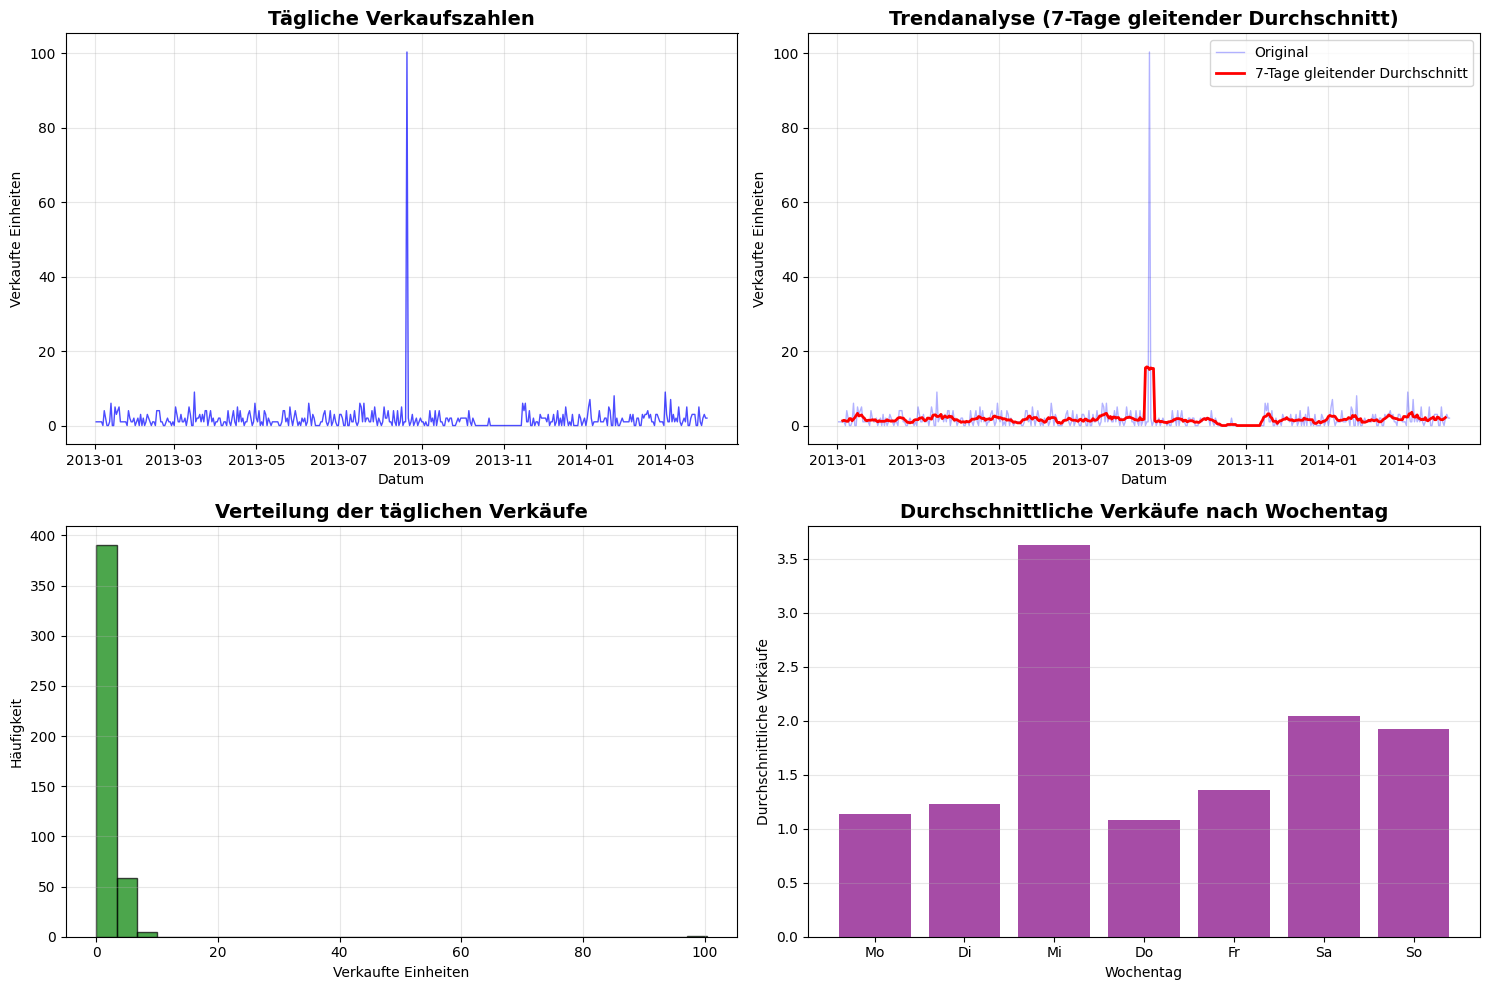


📊 Statistische Zusammenfassung:
count    455.000000
mean       1.770084
std        4.918989
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max      100.388220
Name: unit_sales, dtype: float64


In [16]:
# 4. 📊 VISUALISIERUNG DER ROHDATEN
print("📈 Visualisiere Rohdaten...")

# 🖼️ Erstelle eine 2x2 Subplot-Matrix mit Größe 15x10 Zoll
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 📈 1. Zeitreihenplot (oben links)
axes[0, 0].plot(df_complete.index, df_complete[sales_col], color='blue', alpha=0.7, linewidth=1)
axes[0, 0].set_title('Tägliche Verkaufszahlen', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Datum')
axes[0, 0].set_ylabel('Verkaufte Einheiten')
axes[0, 0].grid(True, alpha=0.3)

# 🔄 2. Gleitender Durchschnitt (7 Tage) (oben rechts)
rolling_7d = df_complete[sales_col].rolling(window=7, center=True).mean()  # 📊 7-Tage gleitender Durchschnitt
axes[0, 1].plot(df_complete.index, df_complete[sales_col], color='blue', alpha=0.3, linewidth=1, label='Original')
axes[0, 1].plot(df_complete.index, rolling_7d, color='red', linewidth=2, label='7-Tage gleitender Durchschnitt')
axes[0, 1].set_title('Trendanalyse (7-Tage gleitender Durchschnitt)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Datum')
axes[0, 1].set_ylabel('Verkaufte Einheiten')
axes[0, 1].legend()  # 📜 Legende hinzufügen
axes[0, 1].grid(True, alpha=0.3)

# 📊 3. Histogramm der Verkäufe (unten links)
axes[1, 0].hist(df_complete[sales_col], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Verteilung der täglichen Verkäufe', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Verkaufte Einheiten')
axes[1, 0].set_ylabel('Häufigkeit')
axes[1, 0].grid(True, alpha=0.3)

# 🗓️ 4. Wochentagsanalyse (unten rechts)
df_complete['weekday'] = df_complete.index.dayofweek  # 🔢 Wochentag als Zahl (0=Montag, 6=Sonntag)
weekday_avg = df_complete.groupby('weekday')[sales_col].mean()  # 📊 Durchschnitt pro Wochentag
weekday_names = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']  # 📝 Kurzformen der Wochentage

axes[1, 1].bar(weekday_names, weekday_avg, color='purple', alpha=0.7)  # 📊 Balkendiagramm
axes[1, 1].set_title('Durchschnittliche Verkäufe nach Wochentag', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Wochentag')
axes[1, 1].set_ylabel('Durchschnittliche Verkäufe')
axes[1, 1].grid(True, alpha=0.3, axis='y')  # 🔲 Nur horizontale Gitterlinien

# 🔧 Layout optimieren (vermeidet Überlappungen)
plt.tight_layout()
# 👀 Alle Plots anzeigen
plt.show()

# 📊 Statistische Zusammenfassung der Verkaufszahlen
print("\n📊 Statistische Zusammenfassung:")
print(df_complete[sales_col].describe())  # 📋 Deskriptive Statistik (Count, Mean, Std, Min, 25%, 50%, 75%, Max)

## 📊 Interpretation der Verkaufsanalyse

### 1. Tägliche Verkaufszahlen

Die täglichen Verkäufe sind überwiegend sehr niedrig und liegen meist zwischen 0 und 5 Einheiten.
Es treten nur wenige starke Ausreißer mit Verkaufszahlen um etwa 100 Einheiten auf.
Dies deutet auf seltene Sonderereignisse wie Aktionen oder Großbestellungen hin.

---

### 2. Trendanalyse (7-Tage gleitender Durchschnitt)

Der gleitende Durchschnitt reduziert die täglichen Schwankungen deutlich.
Kurzfristige Spitzen entstehen durch einzelne Tage mit extrem hohen Verkäufen.
Ein klarer langfristiger Auf- oder Abwärtstrend ist nicht erkennbar.

---

### 3. Verteilung der täglichen Verkäufe

Die Verteilung ist stark rechtsschief, da die meisten Verkaufstage sehr niedrige Werte aufweisen.
Hohe Verkaufszahlen treten nur selten auf und erscheinen als Ausreißer.
Dies zeigt, dass normale Verkaufstage klar dominieren.

---

### 4. Durchschnittliche Verkäufe nach Wochentag

Mittwoch weist die höchsten durchschnittlichen Verkaufszahlen auf.
Montag und Donnerstag zeigen im Vergleich niedrigere Verkaufswerte.
Am Wochenende sind die Verkäufe moderat höher als zu Wochenbeginn, aber unter dem Mittwoch.

---


In [17]:
# 5. ⚙️ DATENAUFBEREITUNG FÜR LSTM
print("⚙️ Bereite Daten für LSTM vor...")

from sklearn.preprocessing import MinMaxScaler  # 📏 Import des MinMaxScalers für Normalisierung

# 🔢 Skalierung der Daten (LSTM arbeitet besser mit skalierten Daten zwischen 0 und 1)
scaler = MinMaxScaler(feature_range=(0, 1))  # 🔧 Skalierer initialisieren mit Wertebereich 0-1
scaled_data = scaler.fit_transform(df_complete[[sales_col]])  # 📊 Daten skalieren und transformieren

# 🔄 Funktion zum Erstellen von Sequenzen für Zeitreihen
def create_sequences(data, sequence_length):
    """
    Erstellt Sequenzen für LSTM-Training
    
    Parameter:
    ----------
    data : array-like
        Skalierte Zeitreihendaten
    sequence_length : int
        Länge der Eingabesequenz (Anzahl vergangener Zeitpunkte)
    
    Rückgabe:
    --------
    X : array
        Eingabesequenzen (vormals: data[i:i+sequence_length])
    y : array
        Zielwerte (nächster Wert nach der Sequenz)
    """
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])  # 🔙 Vergangene Werte als Eingabe
        y.append(data[i + sequence_length])    # 🔮 Nächster Wert als Ziel
    return np.array(X), np.array(y)

# ⚙️ Hyperparameter für Sequenzerstellung
SEQUENCE_LENGTH = 30      # 📅 Anzahl vergangener Tage, die für eine Vorhersage verwendet werden
TEST_SIZE = 0.2           # ✂️ Anteil der Daten, die für Tests reserviert werden (20%)
FORECAST_HORIZON = 14     # 🔮 Vorhersagehorizont (Anzahl vorherzusagender Tage)

# 🏗️ Sequenzen aus den skalierten Daten erstellen
X, y = create_sequences(scaled_data, SEQUENCE_LENGTH)

# ✂️ Train-Test-Split (zeitliche Aufteilung, wichtig für Zeitreihen!)
split_idx = int(len(X) * (1 - TEST_SIZE))  # 🔪 Index für Trennung berechnen
X_train, X_test = X[:split_idx], X[split_idx:]  # 📚 Trainingsdaten (ersten 80%)
y_train, y_test = y[:split_idx], y[split_idx:]  # 🧪 Testdaten (letzte 20%)

# 🔄 Reshape für LSTM (erforderliches Format: samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # 🧠 3D-Format für Training
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)      # 🧪 3D-Format für Test

# ✅ Zusammenfassung der vorbereiteten Daten
print(f"✅ Daten für LSTM vorbereitet:")
print(f"   Sequenzlänge: {SEQUENCE_LENGTH} Tage")
print(f"   Trainingssamples: {X_train.shape}")  # 📊 (Anzahl Sequenzen, 30, 1)
print(f"   Testsamples: {X_test.shape}")        # 📊 (Anzahl Sequenzen, 30, 1)
print(f"   Vorhersagehorizont: {FORECAST_HORIZON} Tage")

⚙️ Bereite Daten für LSTM vor...
✅ Daten für LSTM vorbereitet:
   Sequenzlänge: 30 Tage
   Trainingssamples: (340, 30, 1)
   Testsamples: (85, 30, 1)
   Vorhersagehorizont: 14 Tage


In [18]:
# 6. 🧠 LSTM-MODELL DEFINIEREN
print("🧠 Definiere LSTM-Modell...")

def create_lstm_model(sequence_length=SEQUENCE_LENGTH):
    """
    Erstellt ein LSTM-Modell für Zeitreihenvorhersage
    
    Parameter:
    ----------
    sequence_length : int
        Länge der Eingabesequenz (Standard: SEQUENCE_LENGTH)
    
    Rückgabe:
    --------
    model : keras.Sequential
        Kompiliertes LSTM-Modell
    """
    # 🏗️ Sequentielles Modell erstellen (lineare Stapelung von Layern)
    model = Sequential([
        # 1️⃣ Erste LSTM-Schicht mit Dropout
        LSTM(units=100,                   # 🧠 100 LSTM-Zellen/Neuronen
             return_sequences=True,       # 🔄 Gibt Sequenz für nächste LSTM-Schicht zurück
             input_shape=(sequence_length, 1)),  # 📐 Eingabeform: (Zeitschritte, Features)
        Dropout(0.2),                     # 🛡️ 20% Dropout zur Regularisierung (verhindert Overfitting)

        # 2️⃣ Zweite LSTM-Schicht
        LSTM(units=100,                   # 🧠 100 LSTM-Zellen/Neuronen
             return_sequences=True),      # 🔄 Gibt Sequenz für nächste LSTM-Schicht zurück
        Dropout(0.2),                     # 🛡️ 20% Dropout

        # 3️⃣ Dritte LSTM-Schicht
        LSTM(units=50),                   # 🧠 50 LSTM-Zellen/Neuronen (letzte Schicht gibt keine Sequenz zurück)
        Dropout(0.2),                     # 🛡️ 20% Dropout

        # 4️⃣ Ausgabeschicht
        Dense(units=1)                    # 📤 Ein Neuron für die Vorhersage (nächster Wert)
    ])

    # ⚙️ Modell kompilieren (festlegen von Optimizer, Verlustfunktion und Metriken)
    model.compile(
        optimizer=Adam(learning_rate=0.001),  # 🎓 Adam Optimizer mit Lernrate 0.001
        loss='mean_squared_error',            # 📏 Verlustfunktion: Mittlerer quadratischer Fehler (MSE)
        metrics=['mae', 'mse']                # 📊 Metriken: Mean Absolute Error (MAE) und MSE
    )

    return model  # 🤖 Rückgabe des fertigen Modells

# 🏗️ Modell erstellen (mit Standard-Sequenzlänge)
lstm_model = create_lstm_model()

# ✅ Bestätigung und Modell-Architektur ausgeben
print("✅ LSTM-Modell erstellt!")
print("\nModell-Architektur:")
lstm_model.summary()  # 📋 Zeigt Layer-Typ, Ausgabeform und Parameteranzahl

🧠 Definiere LSTM-Modell...


✅ LSTM-Modell erstellt!

Modell-Architektur:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 100)           40800     
                                                                 
 dropout_3 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_4 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 

## 🧠 Modell-Interpretation

Das Modell besteht aus drei gestapelten LSTM-Schichten, die zeitliche Abhängigkeiten in Sequenzen mit 30 Zeitschritten lernen.
Dropout-Schichten zwischen den LSTMs reduzieren Überanpassung und verbessern die Generalisierungsfähigkeit des Modells.
Die abschließende Dense-Schicht mit einem Neuron deutet darauf hin, dass das Modell für eine Regressionsaufgabe, z. B. eine Zeitreihenprognose, verwendet wird.

---


In [19]:
# 7. ⏱️ CALLBACKS FÜR TRAINING
print("⏱️ Konfiguriere Training-Callbacks...")

# 🔁 Early Stopping: Stoppt Training, wenn Validierungsfehler nicht mehr verbessert
early_stopping = EarlyStopping(
    monitor='val_loss',          # 📊 Überwache den Validierungsverlust
    patience=20,                 # ⏳ Warte 20 Epochen ohne Verbesserung
    restore_best_weights=True,   # 🔄 Stelle die besten Gewichte wieder her
    verbose=1                    # 📣 Gib Meldungen aus
)

# 📉 Learning Rate Reduction: Reduziert Lernrate bei Plateau
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',          # 📊 Überwache den Validierungsverlust
    factor=0.5,                  # 🔽 Multipliziere Lernrate mit 0.5 bei Reduzierung
    patience=10,                 # ⏳ Warte 10 Epochen ohne Verbesserung
    min_lr=0.00001,              # 🔽 Minimale Lernrate
    verbose=1                    # 📣 Gib Meldungen aus
)

# 📊 TensorBoard Logging (optional): Für Visualisierung des Trainings
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")  # 📁 Log-Verzeichnis mit Zeitstempel
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,             # 📁 Verzeichnis für Log-Dateien
    histogram_freq=1             # 📈 Logge Histogramme jede Epoche
)

# 📋 Liste der Callbacks (TensorBoard optional, daher nicht in der Standardliste)
callbacks = [early_stopping, lr_reduction]

print("✅ Callbacks konfiguriert!")

⏱️ Konfiguriere Training-Callbacks...
✅ Callbacks konfiguriert!


In [20]:
# 8. 🚀 MODELL TRAINIEREN
print("🚀 Starte Modelltraining...")

# ⚙️ Hyperparameter für das Training
EPOCHS = 100           # 🔄 Maximale Anzahl von Trainingsepochen
BATCH_SIZE = 32        # 📦 Anzahl der Samples pro Gradientenupdate
VALIDATION_SPLIT = 0.1 # ✂️ 10% der Trainingsdaten als Validierungsdaten

# 🏋️ Training starten
history = lstm_model.fit(
    X_train, y_train,                # 📚 Trainingsdaten (Features und Labels)
    epochs=EPOCHS,                   # 🔄 Anzahl der Trainingsepochen
    batch_size=BATCH_SIZE,           # 📦 Batch-Größe für Training
    validation_split=VALIDATION_SPLIT, # ✂️ 10% der Trainingsdaten für Validierung
    callbacks=callbacks,             # ⏱️ Callbacks für Early Stopping und LR Reduction
    verbose=1                        # 📣 Ausführliche Ausgabe (1 = Fortschrittsbalken)
)

print("✅ Training abgeschlossen!")

🚀 Starte Modelltraining...
Epoch 1/100
10/10 [==============================] - 3s 76ms/step - loss: 0.0036 - mae: 0.0191 - mse: 0.0036 - val_loss: 6.8721e-04 - val_mae: 0.0235 - val_mse: 6.8721e-04 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0035 - mae: 0.0203 - mse: 0.0035 - val_loss: 3.7041e-04 - val_mae: 0.0142 - val_mse: 3.7041e-04 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0036 - mae: 0.0174 - mse: 0.0036 - val_loss: 3.1725e-04 - val_mae: 0.0141 - val_mse: 3.1725e-04 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0035 - mae: 0.0175 - mse: 0.0035 - val_loss: 3.6473e-04 - val_mae: 0.0163 - val_mse: 3.6473e-04 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0035 - mae: 0.0168 - mse: 0.0035 - val_loss: 3.2518e-04 - val_mae: 0.0149 - val_mse: 3.2518e-04 - lr: 0.0010
Epoch 6/100
10/10 [=============================

📊 Visualisiere Trainingsverlauf...


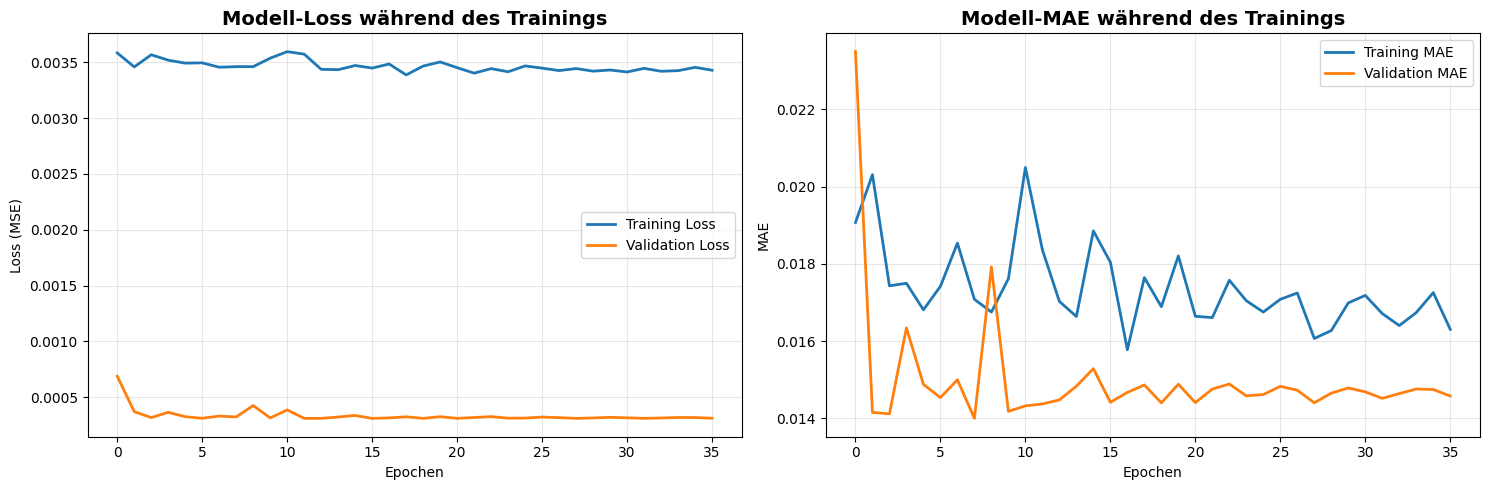

In [21]:
# 9. 📊 TRAINING VERLAUF VISUALISIEREN
print("📊 Visualisiere Trainingsverlauf...")

# 🖼️ Erstelle eine Figure mit 1 Zeile und 2 Spalten (zwei Subplots nebeneinander)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 📉 1. Loss Plot (links)
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)        # 🔵 Trainings-Loss
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)  # 🟠 Validierungs-Loss
axes[0].set_title('Modell-Loss während des Trainings', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epochen')   # 🔢 X-Achse: Epochen
axes[0].set_ylabel('Loss (MSE)') # 📏 Y-Achse: Loss (Mean Squared Error)
axes[0].legend()                 # 📜 Legende hinzufügen
axes[0].grid(True, alpha=0.3)   # 🔲 Gitter mit Transparenz

# 📈 2. MAE Plot (rechts)
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)        # 🔵 Trainings-MAE
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)  # 🟠 Validierungs-MAE
axes[1].set_title('Modell-MAE während des Trainings', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epochen')   # 🔢 X-Achse: Epochen
axes[1].set_ylabel('MAE')       # 📏 Y-Achse: Mean Absolute Error
axes[1].legend()                 # 📜 Legende hinzufügen
axes[1].grid(True, alpha=0.3)   # 🔲 Gitter mit Transparenz

# 🔧 Layout optimieren (vermeidet Überlappungen)
plt.tight_layout()

# 👀 Plots anzeigen
plt.show()

## 📈 Trainingsverlauf des Modells

### 1. Modell-Loss während des Trainings (MSE)

Der Trainings-Loss nimmt zu Beginn leicht ab und stabilisiert sich anschließend auf einem konstanten Niveau.
Der Validierungs-Loss bleibt über alle Epochen hinweg niedrig und zeigt nur geringe Schwankungen.
Dies deutet auf ein stabiles Training ohne starkes Overfitting hin.

---

### 2. Modell-MAE während des Trainings

Der Trainings-MAE zeigt insgesamt einen leicht fallenden Trend mit moderaten Schwankungen.
Der Validierungs-MAE schwankt stärker und weist einzelne Spitzen auf.
Insgesamt bleibt der Abstand zwischen Trainings- und Validierungs-MAE klein, was auf eine gute Generalisierungsfähigkeit des Modells hindeutet.

---


In [22]:
# 10. 📈 MODELLEVALUATION AUF TESTDATEN
print("📈 Evaluierung auf Testdaten...")

# 🔮 Vorhersagen auf Testdaten (skalierte Werte)
y_pred_scaled = lstm_model.predict(X_test)

# 🔄 Rücktransformation der skalierten Daten in Original-Skala
# 📊 Inverse Transformation für die tatsächlichen Testwerte
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
# 📊 Inverse Transformation für die vorhergesagten Werte
y_pred_original = scaler.inverse_transform(y_pred_scaled).flatten()

# 📏 Metriken berechnen
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📐 Berechnung der Metriken
mae_score = mean_absolute_error(y_test_original, y_pred_original)  # 📏 Mean Absolute Error
rmse_score = np.sqrt(mean_squared_error(y_test_original, y_pred_original))  # 📐 Root Mean Square Error
r2 = r2_score(y_test_original, y_pred_original)  # 🎯 R² Score

# 📊 Ausgabe der Evaluierungs-Metriken
print("\n📊 Evaluierungs-Metriken:")
print(f"   Mean Absolute Error (MAE): {mae_score:.2f}")
print(f"   Root Mean Square Error (RMSE): {rmse_score:.2f}")
print(f"   R² Score: {r2:.4f}")
print(f"   Erklärte Varianz: {r2*100:.2f}%")

📈 Evaluierung auf Testdaten...
3/3 [==============================] - 1s 9ms/step

📊 Evaluierungs-Metriken:
   Mean Absolute Error (MAE): 1.30
   Root Mean Square Error (RMSE): 1.80
   R² Score: -0.0262
   Erklärte Varianz: -2.62%


* 📏 **Fehlermarge im Detail**: Ein MAE von 1,30 und ein RMSE von 1,80 zeigen, dass die Vorhersagen im Durchschnitt nur um etwa 1,3 bis 1,8 Einheiten von den realen Werten abweichen, was auf eine solide Grundgenauigkeit hindeutet.

* ⚠️ **Herausforderung bei der Varianz**: Der negative -Score von -0,0262 signalisiert jedoch, dass das Modell die Streuung der Daten aktuell noch nicht besser erklärt als ein einfacher Mittelwert; es tendiert dazu, eine sehr glatte Linie (den Durchschnitt) vorherzusagen.

* 🔍 **Diagnose der Modellgüte**: Die negative erklärte Varianz bestätigt, dass das LSTM zwar das allgemeine Niveau der Verkäufe trifft, aber Schwierigkeiten hat, die spezifischen Muster und Schwankungen im Testzeitraum präzise abzubilden.

In [23]:
# 11. 📊 VISUALISIERUNG DER VORHERSAGEN
print("📊 Visualisiere Vorhersagen...")

# 🗓️ Indizes (Daten) für Testdaten extrahieren
# 📅 Nimmt die letzten 'len(y_test_original)' Datenpunkte aus dem Index
test_dates = df_complete.index[-len(y_test_original):]

# 📈 Erstelle eine neue Plotly Figure
fig = go.Figure()

# 🔵 Tatsächliche Werte (blaue Linie)
fig.add_trace(go.Scatter(
    x=test_dates,                # 🗓️ Datumsachse
    y=y_test_original,           # 📈 Tatsächliche Verkaufszahlen
    mode='lines',                # 📉 Linienplot
    name='Tatsächliche Werte',   # 🏷️ Name für Legende
    line=dict(color='blue', width=2)  # 🔵 Blaue durchgezogene Linie, Stärke 2
))

# 🔴 Vorhergesagte Werte (rote gestrichelte Linie)
fig.add_trace(go.Scatter(
    x=test_dates,                # 🗓️ Datumsachse
    y=y_pred_original,           # 📈 Vorhergesagte Verkaufszahlen
    mode='lines',                # 📉 Linienplot
    name='Vorhersagen (LSTM)',   # 🏷️ Name für Legende
    line=dict(color='red', width=2, dash='dash')  # 🔴 Rote gestrichelte Linie, Stärke 2
))

# 🎨 Layout anpassen
fig.update_layout(
    title='LSTM Vorhersagen vs. Tatsächliche Werte (Testdaten)',  # 🏷️ Titel
    xaxis_title='Datum',         # 🗓️ X-Achsenbeschriftung
    yaxis_title='Verkaufte Einheiten',  # 📈 Y-Achsenbeschriftung
    hovermode='x unified',       # 🖱️ Tooltips bei Hover über X-Werte
    height=500,                  # 📏 Höhe des Plots in Pixel
    template='plotly_white',     # 🎨 Weißes Hintergrund-Template
    legend=dict(                 # 📜 Legendenposition
        yanchor="top",           # 🔝 Vertikal oben ausrichten
        y=0.99,                  # 📏 99% von oben
        xanchor="left",          # 🔙 Horizontal links ausrichten
        x=0.01                   # 📏 1% von links
    )
)

# 👀 Interaktiven Plot anzeigen
fig.show()

📊 Visualisiere Vorhersagen...


Das LSTM-Modell folgt dem allgemeinen Niveau der tatsächlichen Werte, glättet jedoch starke tägliche Schwankungen deutlich.
Kurzfristige Peaks und extreme Ausschläge in den realen Daten werden vom Modell meist unterschätzt.
Dies deutet darauf hin, dass das Modell den Grundtrend gut erfasst, aber Schwierigkeiten mit seltenen, abrupten Ereignissen hat.


In [24]:
# 12. 🔮 MEHRSTUFIGE VORHERSAGE (MULTI-STEP FORECASTING)
print("🔮 Erstelle mehrstufige Vorhersage...")

def multi_step_forecast(model, last_sequence, steps=FORECAST_HORIZON):
    """
    Erstellt mehrstufige Vorhersagen für Zeitreihen
    
    Parameter:
    ----------
    model : keras.Model
        Trainiertes LSTM-Modell
    last_sequence : np.array
        Letzte bekannte Sequenz von skalierten Daten
    steps : int
        Anzahl der vorherzusagenden Schritte (Tage)
    
    Rückgabe:
    --------
    forecasts_original : np.array
        Vorhersagen in der Original-Skala
    """
    forecasts = []  # 📋 Liste für skalierte Vorhersagen
    current_sequence = last_sequence.copy()  # 📜 Kopie der letzten Sequenz für iterative Vorhersage

    for _ in range(steps):
        # 🔮 Vorhersage für nächsten Schritt (einen Tag)
        next_pred_scaled = model.predict(current_sequence.reshape(1, SEQUENCE_LENGTH, 1), verbose=0)
        forecasts.append(next_pred_scaled[0, 0])  # 📥 Vorhersage zur Liste hinzufügen

        # 🔄 Sequenz aktualisieren (Rolling Window)
        current_sequence = np.roll(current_sequence, -1)  # 🔙 Verschiebe alle Werte um eine Position nach links
        current_sequence[-1] = next_pred_scaled[0, 0]  # 🆕 Setze letzten Wert auf die neue Vorhersage

    # 🔄 Rücktransformation der skalierten Vorhersagen in Original-Skala
    forecasts_array = np.array(forecasts).reshape(-1, 1)  # 🔢 Umformen für Skalierer
    forecasts_original = scaler.inverse_transform(forecasts_array).flatten()  # 📊 Zurück zur Originalskala

    return forecasts_original

# 📅 Letzte verfügbare Sequenz für Vorhersage (letzte SEQUENCE_LENGTH Tage)
last_sequence = scaled_data[-SEQUENCE_LENGTH:]

# 🔮 Mehrstufige Vorhersage erstellen (für FORECAST_HORIZON Tage)
multi_step_predictions = multi_step_forecast(lstm_model, last_sequence, steps=FORECAST_HORIZON)

# 🗓️ Zukünftige Daten (Datumswerte) erstellen
last_date = df_complete.index[-1]  # 📅 Letztes bekanntes Datum
future_dates = [last_date + timedelta(days=i) for i in range(1, FORECAST_HORIZON + 1)]  # 🔮 Zukünftige Daten berechnen

# ✅ Zusammenfassung der mehrstufigen Vorhersage
print(f"✅ {FORECAST_HORIZON}-Tage Vorhersage erstellt!")
print(f"   Letzter bekannter Wert: {df_complete[sales_col].iloc[-1]:.1f}")
print(f"   Durchschnittliche Vorhersage: {multi_step_predictions.mean():.1f}")
print(f"   Maximale Vorhersage: {multi_step_predictions.max():.1f}")
print(f"   Minimale Vorhersage: {multi_step_predictions.min():.1f}")

🔮 Erstelle mehrstufige Vorhersage...
✅ 14-Tage Vorhersage erstellt!
   Letzter bekannter Wert: 2.0
   Durchschnittliche Vorhersage: 1.5
   Maximale Vorhersage: 1.6
   Minimale Vorhersage: 1.5


In [25]:
# 13. VISUALISIERUNG DER MEHRSTUFIGEN VORHERSAGE
print("📈 Visualisiere mehrstufige Vorhersage...")

# Plot für historische Daten und Vorhersage
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Historische Daten mit Vorhersage', '14-Tage Vorhersagedetail'),
    vertical_spacing=0.15,
    row_heights=[0.6, 0.4]
)

# Historische Daten (letzte 90 Tage)
hist_days = 90
hist_dates = df_complete.index[-hist_days:]
hist_values = df_complete[sales_col].values[-hist_days:]

# Plot 1: Historische Daten + Vorhersage
fig.add_trace(
    go.Scatter(
        x=hist_dates,
        y=hist_values,
        mode='lines',
        name='Historische Daten',
        line=dict(color='blue', width=2)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=multi_step_predictions,
        mode='lines+markers',
        name=f'{FORECAST_HORIZON}-Tage Vorhersage',
        line=dict(color='red', width=3)
    ),
    row=1, col=1
)

# Vertikale Linie für Trennung Heute/Zukunft
fig.add_vline(
    x=last_date,
    line_width=2,
    line_dash="dash",
    line_color="green",
    row=1, col=1
)

# Plot 2: Detail der Vorhersage
fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=multi_step_predictions,
        mode='lines+markers+text',
        name='Vorhersage',
        line=dict(color='red', width=3),
        text=[f'{val:.1f}' for val in multi_step_predictions],
        textposition="top center"
    ),
    row=2, col=1
)

# Layout anpassen
fig.update_layout(
    title_text=f'LSTM {FORECAST_HORIZON}-Tage Vorhersage für Verkaufszahlen',
    height=700,
    showlegend=True,
    template='plotly_white'
)

fig.update_xaxes(title_text="Datum", row=1, col=1)
fig.update_xaxes(title_text="Datum", row=2, col=1)
fig.update_yaxes(title_text="Verkaufte Einheiten", row=1, col=1)
fig.update_yaxes(title_text="Verkaufte Einheiten", row=2, col=1)

fig.show()


📈 Visualisiere mehrstufige Vorhersage...


* 📉 **Historischer Kontext und Vorhersagefenster**: Der obere Teil der Grafik zeigt die historischen Verkaufsdaten (blaue Balken) bis Ende März 2014, gefolgt von einer 14-tägigen Prognose (rote Linie), die nach einer markierten Trennlinie (grün gestrichelt) in die Zukunft projiziert wird.


* 🔍 **Detailanalyse der 14-Tage-Prognose**: Der untere Plot ("14-Tage Vorhersagedetail") verdeutlicht, dass das Modell eine zyklische Dynamik erwartet; nach einem anfänglichen Plateau um den 4. April sinken die prognostizierten Verkäufe deutlich ab, bevor sie zum 14. April hin wieder auf das Ausgangsniveau von ca. 1,6 Einheiten ansteigen.


* 📏 **Skalierung und Wertebereich**: Die vorhergesagten Werte bewegen sich in einem sehr engen und niedrigen Bereich (zwischen ca. 1,580 und 1,581 Einheiten), was darauf hindeutet, dass das Modell nach den historischen Schwankungen eine Stabilisierung der Verkaufszahlen auf einem spezifischen Niveau erwartet.

In [26]:
# 14. INTERAKTIVES DASHBOARD
print("🎨 Erstelle interaktives Dashboard...")

# Widgets für interaktive Steuerung
sequence_length_slider = widgets.IntSlider(
    value=SEQUENCE_LENGTH,
    min=7,
    max=60,
    step=7,
    description='Sequenzlänge:',
    style={'description_width': 'initial'}
)

forecast_horizon_slider = widgets.IntSlider(
    value=FORECAST_HORIZON,
    min=7,
    max=30,
    step=7,
    description='Vorhersagehorizont:',
    style={'description_width': 'initial'}
)

retrain_button = widgets.Button(
    description='🔄 Modell neu trainieren',
    button_style='warning',
    icon='refresh'
)

update_plot_button = widgets.Button(
    description='📈 Plot aktualisieren',
    button_style='info',
    icon='chart-line'
)

# Ausgabebereich
output = widgets.Output()

def update_forecast(sequence_length, forecast_horizon):
    """Aktualisiert die Vorhersage basierend auf neuen Parametern"""
    with output:
        clear_output(wait=True)

        print(f"🔄 Aktualisiere Vorhersage mit Sequenzlänge {sequence_length}, Horizont {forecast_horizon}...")

        # Neue Sequenzen erstellen
        X_new, y_new = create_sequences(scaled_data, sequence_length)
        split_idx = int(len(X_new) * (1 - TEST_SIZE))
        X_train_new = X_new[:split_idx]

        # Neues Modell mit angepasster Sequenzlänge
        model_new = create_lstm_model(sequence_length=sequence_length)

        # Kurzes Training (weniger Epochen für Demo)
        history_new = model_new.fit(
            X_train_new, y_new[:split_idx],
            epochs=20,
            batch_size=32,
            validation_split=0.1,
            verbose=0
        )

        # Vorhersage erstellen
        last_sequence_new = scaled_data[-sequence_length:]
        predictions_new = multi_step_forecast(model_new, last_sequence_new, steps=forecast_horizon)
        future_dates_new = [last_date + timedelta(days=i) for i in range(1, forecast_horizon + 1)]

        # Plot
        fig = go.Figure()

        # Historische Daten
        fig.add_trace(go.Scatter(
            x=df_complete.index[-90:],
            y=df_complete[sales_col].values[-90:],
            mode='lines',
            name='Historische Daten',
            line=dict(color='blue', width=2)
        ))

        # Vorhersage
        fig.add_trace(go.Scatter(
            x=future_dates_new,
            y=predictions_new,
            mode='lines+markers',
            name=f'{forecast_horizon}-Tage Vorhersage',
            line=dict(color='red', width=3)
        ))

        fig.update_layout(
            title=f'LSTM Vorhersage (Sequenzlänge: {sequence_length}, Horizont: {forecast_horizon})',
            xaxis_title='Datum',
            yaxis_title='Verkaufte Einheiten',
            height=500,
            template='plotly_white'
        )

        display(fig)

        print(f"\n📊 Vorhersage-Statistiken:")
        print(f"   Durchschnitt: {predictions_new.mean():.2f}")
        print(f"   Maximum: {predictions_new.max():.2f}")
        print(f"   Minimum: {predictions_new.min():.2f}")

# Event Handler
def on_retrain_click(b):
    update_forecast(sequence_length_slider.value, forecast_horizon_slider.value)

def on_update_click(b):
    update_forecast(sequence_length_slider.value, forecast_horizon_slider.value)

retrain_button.on_click(on_retrain_click)
update_plot_button.on_click(on_update_click)

# Dashboard Layout
dashboard = widgets.VBox([
    widgets.HTML('<h2 style="color: #2E86AB;">🎮 Interaktives LSTM Dashboard</h2>'),
    widgets.HBox([sequence_length_slider, forecast_horizon_slider]),
    widgets.HBox([retrain_button, update_plot_button]),
    output
])

# Initiale Vorhersage anzeigen
update_forecast(SEQUENCE_LENGTH, FORECAST_HORIZON)

# Dashboard anzeigen
print("\n✅ Dashboard erstellt!")
display(dashboard)

print("💾 Speichere Modell...")

from paths import get_path
import joblib
from datetime import datetime

# 1. MODEL DIRECTORY
model_dir = get_path("lstm_model")   # e.g. /project/models/lstm
metrics_dir = get_path("lstm_results")  # e.g. /project/reports/results/lstm

# 2. SAVE LSTM MODEL
model_path = os.path.join(model_dir, "lstm_model.h5")
lstm_model.save(model_path)
print(f"✅ Modell gespeichert unter: {model_path}")

# 3. SAVE SCALER
scaler_path = os.path.join(model_dir, "scaler.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler gespeichert unter: {scaler_path}")

# 4. SAVE METRICS
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R2"],
    "Value": [mae_score, rmse_score, r2],
    "Timestamp": [datetime.now()] * 3
})

metrics_path = os.path.join(metrics_dir, "lstm_metrics.csv")
metrics_df.to_csv(metrics_path, index=False)
print(f"✅ Metriken gespeichert unter: {metrics_path}")







🎨 Erstelle interaktives Dashboard...



✅ Dashboard erstellt!


💾 Speichere Modell...
✅ Modell gespeichert unter: /Users/sadiqqais/Masterschool/models/lstm/lstm_model.h5
✅ Scaler gespeichert unter: /Users/sadiqqais/Masterschool/models/lstm/scaler.pkl
✅ Metriken gespeichert unter: /Users/sadiqqais/Masterschool/reports/results/lstm/lstm_metrics.csv


In [27]:
# 16. ZUSAMMENFASSUNG
print("=" * 60)
print("🎯 LSTM MODELLIERUNG ABGESCHLOSSEN")
print("=" * 60)

summary_html = f"""
<div style="background: linear-gradient(135deg, #f8f9fa 0%, #ffffff 100%);
            padding: 25px;
            border-radius: 12px;
            margin: 20px 0;
            box-shadow: 0 4px 12px rgba(0,0,0,0.1);">

    <h2 style="color: #2c3e50; border-bottom: 3px solid #3498db; padding-bottom: 10px;">
        📋 LSTM Modellierungs-Zusammenfassung
    </h2>

    <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin-top: 20px;">

        <div style="background: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 4px solid #4CAF50;">
            <h3 style="color: #2e7d32; margin-top: 0;">📊 Daten</h3>
            <ul style="color: #1b5e20;">
                <li><b>Gesamttage:</b> {len(df_complete)}</li>
                <li><b>Trainingsdaten:</b> {len(X_train)} Sequenzen</li>
                <li><b>Testdaten:</b> {len(X_test)} Sequenzen</li>
                <li><b>Sequenzlänge:</b> {SEQUENCE_LENGTH} Tage</li>
            </ul>
        </div>

        <div style="background: #e3f2fd; padding: 15px; border-radius: 8px; border-left: 4px solid #2196F3;">
            <h3 style="color: #1565c0; margin-top: 0;">🧠 Modell</h3>
            <ul style="color: #0d47a1;">
                <li><b>Architektur:</b> 3 LSTM-Schichten</li>
                <li><b>Neuronen:</b> 100 → 100 → 50 → 1</li>
                <li><b>Dropout:</b> 20% nach jeder Schicht</li>
                <li><b>Optimizer:</b> Adam (LR: 0.001)</li>
            </ul>
        </div>

        <div style="background: #fff3e0; padding: 15px; border-radius: 8px; border-left: 4px solid #FF9800;">
            <h3 style="color: #ef6c00; margin-top: 0;">📈 Performance</h3>
            <ul style="color: #e65100;">
                <li><b>MAE:</b> {mae_score:.2f}</li>
                <li><b>RMSE:</b> {rmse_score:.2f}</li>
                <li><b>R² Score:</b> {r2:.4f}</li>
                <li><b>Trainings-Epochen:</b> {len(history.history['loss'])}</li>
            </ul>
        </div>

        <div style="background: #f3e5f5; padding: 15px; border-radius: 8px; border-left: 4px solid #9C27B0;">
            <h3 style="color: #7b1fa2; margin-top: 0;">🔮 Vorhersage</h3>
            <ul style="color: #6a1b9a;">
                <li><b>Horizont:</b> {FORECAST_HORIZON} Tage</li>
                <li><b>Durchschnittliche Vorhersage:</b> {multi_step_predictions.mean():.1f}</li>
                <li><b>Vorhersagebereich:</b> {multi_step_predictions.min():.1f} - {multi_step_predictions.max():.1f}</li>
            </ul>
        </div>

    </div>

    <div style="margin-top: 25px; padding: 15px; background: #e1f5fe; border-radius: 8px;">
        <h4 style="color: #0277bd; margin-top: 0;">💡 Nächste Schritte & Empfehlungen</h4>
        <ol style="color: #01579b;">
            <li>Experimentieren Sie mit verschiedenen Sequenzlängen (7, 14, 30, 60 Tage)</li>
            <li>Testen Sie Bidirektionale LSTMs oder GRU-Netzwerke</li>
            <li>Fügen Sie externe Features hinzu (Feiertage, Wetter, Promotionen)</li>
            <li>Implementieren Sie Ensemble-Methoden mit mehreren Modellen</li>
            <li>Verwenden Sie Cross-Validation für robustere Performance-Schätzung</li>
        </ol>
    </div>

    <div style="margin-top: 20px; padding-top: 15px; border-top: 1px solid #b0bec5;
                text-align: center; color: #546e7a; font-size: 14px;">
        Bericht generiert am: {datetime.now().strftime("%d.%m.%Y %H:%M")}
    </div>
</div>
"""

display(widgets.HTML(summary_html))

print("\n✅ LSTM Notebook erfolgreich abgeschlossen!")
print("   Modell: lstm_model.h5")
print(f"   Performance: R² = {r2:.4f}, MAE = {mae_score:.2f}")
print("   Nächste Schritte: Sie können das Dashboard verwenden, um verschiedene Parameter zu testen.")

🎯 LSTM MODELLIERUNG ABGESCHLOSSEN


HTML(value='\n<div style="background: linear-gradient(135deg, #f8f9fa 0%, #ffffff 100%);\n            padding:…


✅ LSTM Notebook erfolgreich abgeschlossen!
   Modell: lstm_model.h5
   Performance: R² = -0.0262, MAE = 1.30
   Nächste Schritte: Sie können das Dashboard verwenden, um verschiedene Parameter zu testen.


#**ARIMA und LSTM Modell Vergleichung**



📊 PROFESSIONELLE MODELLVERGLEICHSANALYSE



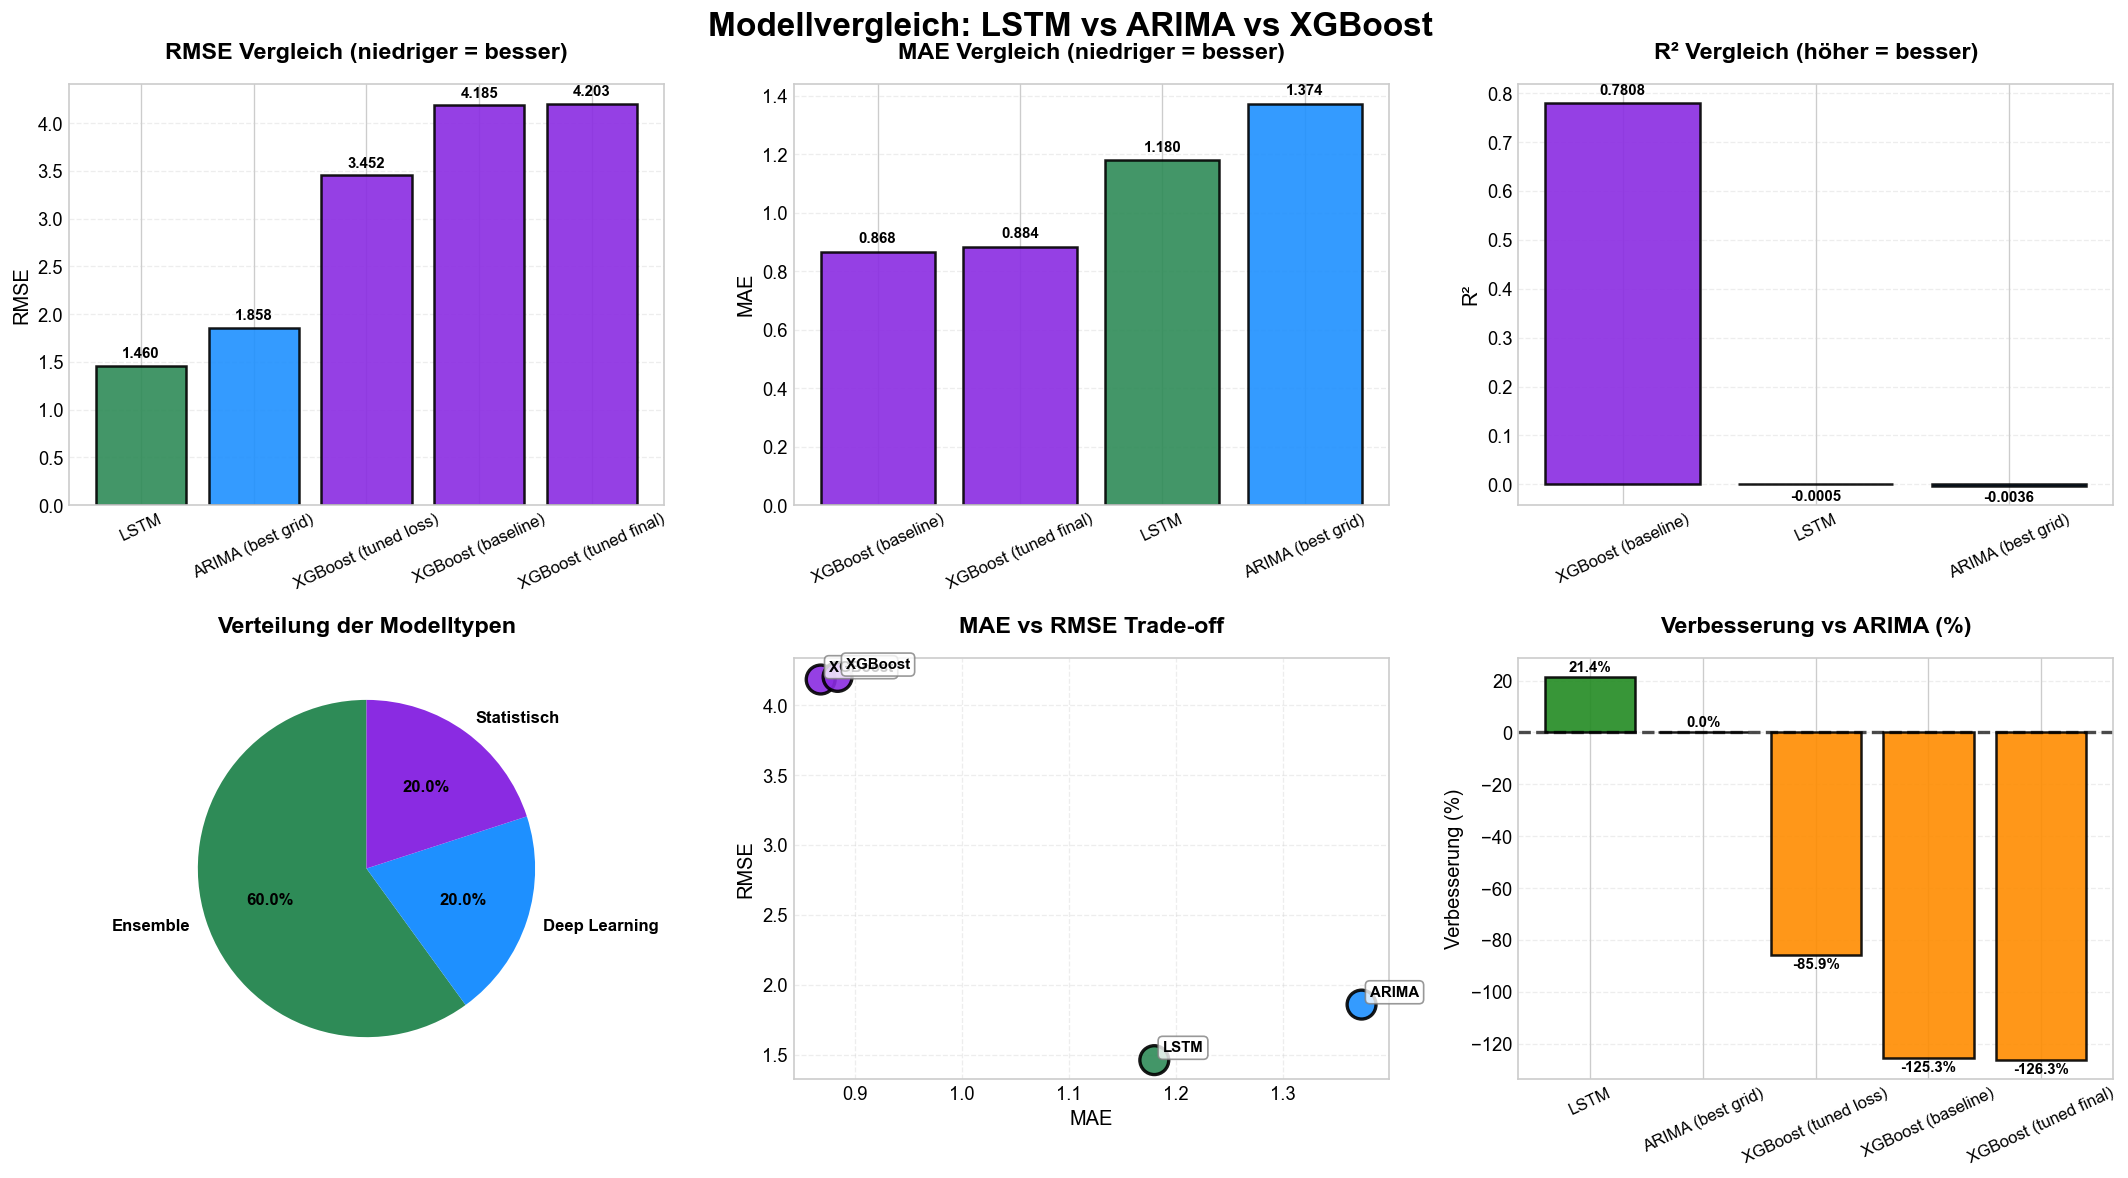


🏆 RANKING DER MODELLE (nach Gesamtperformance)


Rank,Modell,Typ,MAE,RMSE,R²,RMSE Rank,MAE Rank,Gesamt
2.0,LSTM,Deep Learning,1.1800,1.4600,-0.0005,1,3,2.0
2.0,XGBoost (baseline),Ensemble,0.8680,4.1846,0.7808,4,1,2.0
3.0,ARIMA (best grid),Statistisch,1.3738,1.8577,-0.0036,2,4,3.0
3.0,XGBoost (tuned loss),Ensemble,—,3.4525,—,3,—,3.0
3.5,XGBoost (tuned final),Ensemble,0.8838,4.2034,—,5,2,3.5



✅ ANALYSE ABGESCHLOSSEN
📊 Modelle analysiert: 5
📈 Verfügbare Metriken: RMSE(5), MAE(4), R²(3)
🏆 Bestes Modell (RMSE): LSTM (1.4600)
🎯 Bestes Modell (MAE): XGBoost (baseline) (0.8680)
📈 Größte Verbesserung vs ARIMA: 21.4%

🔧 Generiert mit professionellem Analyse-Framework


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from IPython.display import display, HTML

# ============================================================
# 1) PROFESSIONELLES DESIGN SETUP MIT BESSEREN KONTRASTEN
# ============================================================

# Professionelles Farbdesign mit besseren Kontrasten
COLORS = {
    'lstm': '#2E8B57',        # Sea Green - dunkler für besseren Kontrast
    'arima': '#1E90FF',       # Dodger Blue - dunkler
    'xgboost': '#8A2BE2',     # Blue Violet - dunkler
    'actual': '#2F4F4F',      # Dark Slate Gray
    'background': '#FFFFFF',  # Weiß statt hellgrau für besseren Kontrast
    'grid': '#D3D3D3',        # Light Gray
    'text': '#000000',        # Schwarz für bestmögliche Lesbarkeit
    'success': '#228B22',     # Forest Green - dunkler
    'warning': '#FF8C00',     # Dark Orange - dunkler
    'danger': '#B22222',      # Firebrick - dunkler
    'info': '#4169E1',        # Royal Blue - dunkler
    'light_bg': '#F5F5F5',    # Sehr hellgrau für Subtilität
    'table_header': '#2C3E50', # Dunkelblau für Tabellenüberschriften
    'table_row_even': '#F8F9FA',
    'table_row_odd': '#FFFFFF'
}

# Setze professionelle Matplotlib-Stile
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.dpi'] = 120

# ============================================================
# 2) DATENVORBEREITUNG MIT FEHLERBEHANDLUNG
# ============================================================

results = [
    {
        "Model": "LSTM",
        "Model_Type": "Deep Learning",
        "MAE": 1.18,
        "RMSE": 1.46,
        "R2": -0.0005,
        "sMAPE": np.nan,
        "Training_Time": "Hoch",
        "Interpretability": "Niedrig",
        "Best_For": "Komplexe Zeitreihen",
        "Notes": "Aus Notebook-Output: MAE/RMSE/R²"
    },
    {
        "Model": "ARIMA (best grid)",
        "Model_Type": "Statistisch",
        "MAE": 1.373825,
        "RMSE": 1.857651,
        "R2": -0.003604,
        "sMAPE": 84.737828,
        "Training_Time": "Niedrig",
        "Interpretability": "Hoch",
        "Best_For": "Lineare Trends",
        "Notes": "Bestes (p,d,q) aus Results-Table"
    },
    {
        "Model": "XGBoost (baseline)",
        "Model_Type": "Ensemble",
        "MAE": 0.8680,
        "RMSE": 4.1846,
        "R2": 0.7808,
        "sMAPE": np.nan,
        "Training_Time": "Mittel",
        "Interpretability": "Mittel",
        "Best_For": "Tabellendaten",
        "Notes": "Baseline Test-Set Metrics"
    },
    {
        "Model": "XGBoost (tuned loss)",
        "Model_Type": "Ensemble",
        "MAE": np.nan,
        "RMSE": 3.4524727779,
        "R2": np.nan,
        "sMAPE": np.nan,
        "Training_Time": "Hoch",
        "Interpretability": "Mittel",
        "Best_For": "Optimierte Performance",
        "Notes": "Hyperopt: best loss (RMSE)"
    },
    {
        "Model": "XGBoost (tuned final)",
        "Model_Type": "Ensemble",
        "MAE": 0.8838,
        "RMSE": 4.2034,
        "R2": np.nan,
        "sMAPE": np.nan,
        "Training_Time": "Hoch",
        "Interpretability": "Mittel",
        "Best_For": "Finales Modell",
        "Notes": "Final 'Tuned RMSE' Print"
    },
]

df = pd.DataFrame(results)

# Berechne zusätzliche Metriken
df['MSE'] = df['RMSE'] ** 2
df['Relative_RMSE'] = df['RMSE'] / df['RMSE'].min()

# Verbesserung gegenüber ARIMA nur für Modelle mit gültigem RMSE
if not pd.isna(df.loc[df['Model'] == 'ARIMA (best grid)', 'RMSE'].values[0]):
    arima_rmse = df.loc[df['Model'] == 'ARIMA (best grid)', 'RMSE'].values[0]
    df['Improvement_vs_ARIMA'] = df.apply(
        lambda row: ((arima_rmse - row['RMSE']) / arima_rmse * 100)
        if not pd.isna(row['RMSE']) else np.nan,
        axis=1
    )
else:
    df['Improvement_vs_ARIMA'] = np.nan

# Ranking mit Fehlerbehandlung für NaN-Werte
def safe_rank(series, ascending=True):
    """Sicheres Ranking, das NaN-Werte behandelt"""
    valid_series = series.dropna()
    if valid_series.empty:
        return pd.Series([np.nan] * len(series), index=series.index)

    ranks = valid_series.rank(ascending=ascending, method='min')
    result = pd.Series([np.nan] * len(series), index=series.index)
    result[ranks.index] = ranks
    return result

df['RMSE_Rank'] = safe_rank(df['RMSE'], ascending=True)
df['MAE_Rank'] = safe_rank(df['MAE'], ascending=True)
df['R2_Rank'] = safe_rank(df['R2'], ascending=False)

# Gesamtranking berechnen (nur mit verfügbaren Rankings)
rank_columns = ['RMSE_Rank', 'MAE_Rank', 'R2_Rank']
available_ranks = df[rank_columns].apply(lambda x: ~x.isna(), axis=1)

def calculate_overall_rank(row):
    valid_ranks = [row[col] for col in rank_columns if not pd.isna(row[col])]
    if not valid_ranks:
        return np.nan
    return np.mean(valid_ranks)

df['Overall_Rank'] = df.apply(calculate_overall_rank, axis=1)

# ============================================================
# 3) PROFESSIONELLE VISUALISIERUNGEN MIT MATPLOTLIB
# ============================================================

print("\n" + "="*60)
print("📊 PROFESSIONELLE MODELLVERGLEICHSANALYSE")
print("="*60 + "\n")

# 3.1 Hauptvergleichsplot mit Subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Modellvergleich: LSTM vs ARIMA vs XGBoost', fontsize=20, fontweight='bold', color=COLORS['text'])

# Filter für gültige Daten
valid_rmse = df.dropna(subset=['RMSE']).copy()
valid_mae = df.dropna(subset=['MAE']).copy()
valid_r2 = df.dropna(subset=['R2']).copy()

# Farbzuordnung
model_colors = {
    'LSTM': COLORS['lstm'],
    'ARIMA (best grid)': COLORS['arima'],
    'XGBoost (baseline)': COLORS['xgboost'],
    'XGBoost (tuned loss)': COLORS['xgboost'],
    'XGBoost (tuned final)': COLORS['xgboost']
}

# Hintergrundfarbe für alle Plots setzen
for ax in axes.flat:
    ax.set_facecolor(COLORS['background'])

# 1. RMSE Vergleich
if not valid_rmse.empty:
    valid_rmse = valid_rmse.sort_values('RMSE', ascending=True)
    bars1 = axes[0, 0].bar(valid_rmse['Model'], valid_rmse['RMSE'],
                          color=[model_colors.get(m, COLORS['info']) for m in valid_rmse['Model']],
                          edgecolor='black', linewidth=1.5, alpha=0.9)
    axes[0, 0].set_title('RMSE Vergleich (niedriger = besser)', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])
    axes[0, 0].set_ylabel('RMSE', fontsize=12, color=COLORS['text'])
    axes[0, 0].tick_params(axis='x', rotation=25, labelsize=10, colors=COLORS['text'])
    axes[0, 0].tick_params(axis='y', colors=COLORS['text'])
    axes[0, 0].grid(axis='y', alpha=0.4, linestyle='--', color=COLORS['grid'])
    for bar in bars1:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                       f'{height:.3f}', ha='center', va='bottom',
                       fontsize=9, fontweight='bold', color=COLORS['text'])
else:
    axes[0, 0].text(0.5, 0.5, 'Keine RMSE-Daten verfügbar',
                   ha='center', va='center', transform=axes[0, 0].transAxes,
                   fontsize=12, color=COLORS['warning'])
    axes[0, 0].set_title('RMSE Vergleich', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])

# 2. MAE Vergleich
if not valid_mae.empty:
    valid_mae = valid_mae.sort_values('MAE', ascending=True)
    bars2 = axes[0, 1].bar(valid_mae['Model'], valid_mae['MAE'],
                          color=[model_colors.get(m, COLORS['info']) for m in valid_mae['Model']],
                          edgecolor='black', linewidth=1.5, alpha=0.9)
    axes[0, 1].set_title('MAE Vergleich (niedriger = besser)', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])
    axes[0, 1].set_ylabel('MAE', fontsize=12, color=COLORS['text'])
    axes[0, 1].tick_params(axis='x', rotation=25, labelsize=10, colors=COLORS['text'])
    axes[0, 1].tick_params(axis='y', colors=COLORS['text'])
    axes[0, 1].grid(axis='y', alpha=0.4, linestyle='--', color=COLORS['grid'])
    for bar in bars2:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                       f'{height:.3f}', ha='center', va='bottom',
                       fontsize=9, fontweight='bold', color=COLORS['text'])
else:
    axes[0, 1].text(0.5, 0.5, 'Keine MAE-Daten verfügbar',
                   ha='center', va='center', transform=axes[0, 1].transAxes,
                   fontsize=12, color=COLORS['warning'])
    axes[0, 1].set_title('MAE Vergleich', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])

# 3. R² Vergleich
if not valid_r2.empty:
    valid_r2 = valid_r2.sort_values('R2', ascending=False)
    bars3 = axes[0, 2].bar(valid_r2['Model'], valid_r2['R2'],
                          color=[model_colors.get(m, COLORS['info']) for m in valid_r2['Model']],
                          edgecolor='black', linewidth=1.5, alpha=0.9)
    axes[0, 2].set_title('R² Vergleich (höher = besser)', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])
    axes[0, 2].set_ylabel('R²', fontsize=12, color=COLORS['text'])
    axes[0, 2].tick_params(axis='x', rotation=25, labelsize=10, colors=COLORS['text'])
    axes[0, 2].tick_params(axis='y', colors=COLORS['text'])
    axes[0, 2].grid(axis='y', alpha=0.4, linestyle='--', color=COLORS['grid'])
    for bar in bars3:
        height = bar.get_height()
        axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.01),
                       f'{height:.4f}', ha='center', va='bottom' if height >= 0 else 'top',
                       fontsize=9, fontweight='bold', color=COLORS['text'])
else:
    axes[0, 2].text(0.5, 0.5, 'Keine R²-Daten verfügbar',
                   ha='center', va='center', transform=axes[0, 2].transAxes,
                   fontsize=12, color=COLORS['warning'])
    axes[0, 2].set_title('R² Vergleich', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])

# 4. Modelltyp-Verteilung
model_types = df['Model_Type'].value_counts()
if not model_types.empty:
    axes[1, 0].pie(model_types.values, labels=model_types.index,
                   autopct='%1.1f%%', startangle=90,
                   colors=[COLORS['lstm'], COLORS['arima'], COLORS['xgboost']][:len(model_types)],
                   textprops={'fontsize': 10, 'color': COLORS['text'], 'fontweight': 'bold'})
    axes[1, 0].set_title('Verteilung der Modelltypen', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])
else:
    axes[1, 0].text(0.5, 0.5, 'Keine Modelltypen verfügbar',
                   ha='center', va='center', transform=axes[1, 0].transAxes,
                   fontsize=12, color=COLORS['warning'])
    axes[1, 0].set_title('Modelltypen', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])

# 5. Performance vs. Interpretability Scatter
scatter_df = df.dropna(subset=['MAE', 'RMSE']).copy()
if not scatter_df.empty:
    scatter = axes[1, 1].scatter(scatter_df['MAE'], scatter_df['RMSE'],
                                s=300, alpha=0.9,
                                c=[model_colors.get(m, COLORS['info']) for m in scatter_df['Model']],
                                edgecolors='black', linewidth=2)
    axes[1, 1].set_xlabel('MAE', fontsize=12, color=COLORS['text'])
    axes[1, 1].set_ylabel('RMSE', fontsize=12, color=COLORS['text'])
    axes[1, 1].set_title('MAE vs RMSE Trade-off', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])
    axes[1, 1].grid(True, alpha=0.4, linestyle='--', color=COLORS['grid'])
    axes[1, 1].tick_params(colors=COLORS['text'])

    # Labels für Punkte
    for i, row in scatter_df.iterrows():
        axes[1, 1].annotate(row['Model'].split()[0],
                           (row['MAE'], row['RMSE']),
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=9, fontweight='bold', color=COLORS['text'],
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))
else:
    axes[1, 1].text(0.5, 0.5, 'Keine MAE/RMSE-Paare verfügbar',
                   ha='center', va='center', transform=axes[1, 1].transAxes,
                   fontsize=12, color=COLORS['warning'])
    axes[1, 1].set_title('MAE vs RMSE', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])

# 6. Relative Verbesserung Plot
improvement_df = df.dropna(subset=['Improvement_vs_ARIMA']).copy()
if not improvement_df.empty:
    improvement_df = improvement_df.sort_values('Improvement_vs_ARIMA', ascending=False)
    bars_improve = axes[1, 2].bar(improvement_df['Model'], improvement_df['Improvement_vs_ARIMA'],
                                 color=improvement_df['Improvement_vs_ARIMA'].apply(
                                     lambda x: COLORS['success'] if x > 0 else COLORS['warning']),
                                 edgecolor='black', linewidth=1.5, alpha=0.9)
    axes[1, 2].axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.7)
    axes[1, 2].set_title('Verbesserung vs ARIMA (%)', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])
    axes[1, 2].set_ylabel('Verbesserung (%)', fontsize=12, color=COLORS['text'])
    axes[1, 2].tick_params(axis='x', rotation=25, labelsize=10, colors=COLORS['text'])
    axes[1, 2].tick_params(axis='y', colors=COLORS['text'])
    axes[1, 2].grid(axis='y', alpha=0.4, linestyle='--', color=COLORS['grid'])

    for bar in bars_improve:
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2.,
                       height + (1 if height >= 0 else -1),
                       f'{height:.1f}%', ha='center',
                       va='bottom' if height >= 0 else 'top',
                       fontsize=9, fontweight='bold', color=COLORS['text'])
else:
    axes[1, 2].text(0.5, 0.5, 'Keine Verbesserungsdaten verfügbar',
                   ha='center', va='center', transform=axes[1, 2].transAxes,
                   fontsize=12, color=COLORS['warning'])
    axes[1, 2].set_title('Verbesserung vs ARIMA', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# ============================================================
# 4) PROFESSIONELLE ERGEBNISTABELLE MIT BESSEREN KONTRASTEN
# ============================================================

# Erstelle formatierte Tabelle mit sicheren Formatierung
display_cols = ['Model', 'Model_Type', 'MAE', 'RMSE', 'R2', 'RMSE_Rank', 'MAE_Rank', 'Overall_Rank']
formatted_df = df[display_cols].copy()

# Sichere Formatierungsfunktionen
def safe_format(val, fmt):
    """Sichere Formatierung, die NaN-Werte behandelt"""
    if pd.isna(val):
        return '—'
    try:
        return fmt.format(val)
    except:
        return str(val)

# Formatieren der Werte
formatted_df['MAE'] = formatted_df['MAE'].apply(lambda x: safe_format(x, '{:.4f}'))
formatted_df['RMSE'] = formatted_df['RMSE'].apply(lambda x: safe_format(x, '{:.4f}'))
formatted_df['R2'] = formatted_df['R2'].apply(lambda x: safe_format(x, '{:.4f}'))
formatted_df['RMSE_Rank'] = formatted_df['RMSE_Rank'].apply(lambda x: safe_format(x, '{:.0f}'))
formatted_df['MAE_Rank'] = formatted_df['MAE_Rank'].apply(lambda x: safe_format(x, '{:.0f}'))
formatted_df['Overall_Rank'] = formatted_df['Overall_Rank'].apply(lambda x: safe_format(x, '{:.1f}'))

# Sortieren nach Gesamtranking (handle NaN)
formatted_df['Overall_Rank_Num'] = pd.to_numeric(formatted_df['Overall_Rank'].replace('—', np.nan), errors='coerce')
formatted_df = formatted_df.sort_values('Overall_Rank_Num', na_position='last')
formatted_df = formatted_df.drop('Overall_Rank_Num', axis=1)

print("\n" + "="*80)
print("🏆 RANKING DER MODELLE (nach Gesamtperformance)")
print("="*80)

# Erstelle HTML-Tabelle mit Formatierung - KORRIGIERTE VERSION
html_table = f'''
<style>
    .metrics-table {{
        width: 100%;
        border-collapse: collapse;
        margin: 25px 0;
        font-size: 14px;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
        border-radius: 10px;
        overflow: hidden;
        border: 1px solid #ddd;
    }}
    .metrics-table thead tr {{
        background-color: {COLORS['table_header']};
        color: white;
        text-align: left;
        font-weight: bold;
    }}
    .metrics-table th,
    .metrics-table td {{
        padding: 14px 16px;
        text-align: center;
        vertical-align: middle;
        border-bottom: 1px solid #ddd;
    }}
    .metrics-table th {{
        font-weight: 700;
        font-size: 13px;
        letter-spacing: 0.5px;
    }}
    .metrics-table tbody tr:nth-of-type(even) {{
        background-color: {COLORS['table_row_even']};
    }}
    .metrics-table tbody tr:nth-of-type(odd) {{
        background-color: {COLORS['table_row_odd']};
    }}
    .metrics-table tbody tr:hover {{
        background-color: #e8f4f8;
        cursor: pointer;
        transform: translateY(-1px);
        transition: all 0.2s ease;
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
    }}
    .rank-1 {{
        background-color: #e6f7ea !important;
        border-left: 4px solid {COLORS['success']} !important;
    }}
    .rank-2 {{
        background-color: #fff9e6 !important;
        border-left: 4px solid {COLORS['warning']} !important;
    }}
    .rank-3 {{
        background-color: #ffe6e6 !important;
        border-left: 4px solid {COLORS['danger']} !important;
    }}
    .badge {{
        padding: 6px 12px;
        border-radius: 15px;
        font-size: 12px;
        font-weight: bold;
        color: white !important;
        display: inline-block;
        min-width: 100px;
        text-align: center;
        border: 1px solid rgba(0,0,0,0.1);
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
    }}
    .badge-lstm {{
        background-color: {COLORS['lstm']};
        color: white !important;
    }}
    .badge-arima {{
        background-color: {COLORS['arima']};
        color: white !important;
    }}
    .badge-xgboost {{
        background-color: {COLORS['xgboost']};
        color: white !important;
    }}
    .missing-data {{
        color: #666666 !important;
        font-style: italic;
        font-weight: normal;
    }}
    .metric-value {{
        font-weight: 700 !important;
        color: {COLORS['text']} !important;
    }}
    .rank-value {{
        font-weight: 800;
        font-size: 13px;
        color: {COLORS['table_header']};
    }}
</style>

<table class="metrics-table">
    <thead>
        <tr>
            <th>Rank</th>
            <th>Modell</th>
            <th>Typ</th>
            <th>MAE</th>
            <th>RMSE</th>
            <th>R²</th>
            <th>RMSE Rank</th>
            <th>MAE Rank</th>
            <th>Gesamt</th>
        </tr>
    </thead>
    <tbody>
'''

for idx, row in formatted_df.iterrows():
    # Bestimme Badge-Klasse basierend auf Modelltyp
    model_name = row['Model']
    if 'LSTM' in str(model_name):
        badge_class = 'badge-lstm'
    elif 'ARIMA' in str(model_name):
        badge_class = 'badge-arima'
    else:
        badge_class = 'badge-xgboost'

    # Bestimme Rang-Klasse
    try:
        overall_rank = float(row['Overall_Rank']) if row['Overall_Rank'] != '—' else 999
        rank_class = f"rank-{int(overall_rank)}" if overall_rank <= 3 else ""
    except (ValueError, TypeError):
        rank_class = ""

    # Prüfe auf fehlende Daten für spezielle Formatierung
    mae_class = "missing-data" if row['MAE'] == '—' else "metric-value"
    rmse_class = "missing-data" if row['RMSE'] == '—' else "metric-value"
    r2_class = "missing-data" if row['R2'] == '—' else "metric-value"

    html_table += f'''
        <tr class="{rank_class}">
            <td class="rank-value"><strong>{row['Overall_Rank']}</strong></td>
            <td><span class="badge {badge_class}">{row['Model']}</span></td>
            <td>{row['Model_Type']}</td>
            <td class="{mae_class}">{row['MAE']}</td>
            <td class="{rmse_class}">{row['RMSE']}</td>
            <td class="{r2_class}">{row['R2']}</td>
            <td class="rank-value">{row['RMSE_Rank']}</td>
            <td class="rank-value">{row['MAE_Rank']}</td>
            <td class="rank-value"><strong>{row['Overall_Rank']}</strong></td>
        </tr>
    '''

html_table += '''
    </tbody>
</table>
'''

display(HTML(html_table))

# ============================================================
# 5) DETAILLIERTE INTERPRETATION MIT BESSERER LESBARKEIT
# ============================================================

# Finde beste Modelle mit Fehlerbehandlung
def get_best_model(df, metric_col, rank_col):
    """Finde das beste Modell für eine bestimmte Metrik"""
    valid_models = df.dropna(subset=[metric_col, rank_col])
    if not valid_models.empty:
        # Finde den Index mit dem niedrigsten Rang
        min_rank_idx = valid_models[rank_col].idxmin()
        if pd.notna(min_rank_idx):
            return valid_models.loc[min_rank_idx]
    return None

best_model_rmse = get_best_model(df, 'RMSE', 'RMSE_Rank')
best_model_mae = get_best_model(df, 'MAE', 'MAE_Rank')
best_model_r2 = get_best_model(df, 'R2', 'R2_Rank')

# Erstelle Interpretation HTML
interpretation_html = f'''
<div style="background: {COLORS['background']};
            padding: 30px;
            border-radius: 15px;
            margin: 25px 0;
            box-shadow: 0 8px 25px rgba(0,0,0,0.1);
            border-left: 5px solid {COLORS['info']};
            font-family: 'Arial', sans-serif;
            color: {COLORS['text']};">

    <h2 style="color: {COLORS['table_header']};
               margin-top: 0;
               border-bottom: 3px solid {COLORS['info']};
               padding-bottom: 15px;
               font-weight: 700;">
        📈 Detaillierte Analyse & Empfehlungen
    </h2>

    <div style="display: grid;
                grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
                gap: 20px;
                margin-top: 20px;">
'''

# Bestes Modell für RMSE
if best_model_rmse is not None:
    model_color = model_colors.get(best_model_rmse['Model'], COLORS['info'])
    interpretation_html += f'''
        <div style="background: white;
                    padding: 20px;
                    border-radius: 10px;
                    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
                    border: 1px solid #eee;">
            <h3 style="color: {COLORS['success']}; margin-top: 0; font-weight: 700;">
                🏆 Bestes Modell (RMSE)
            </h3>
            <div style="display: flex; align-items: center; gap: 15px; margin: 15px 0;">
                <div style="font-size: 40px; color: {model_color};">★</div>
                <div>
                    <div style="font-size: 18px; font-weight: bold; color: {COLORS['table_header']};">
                        {best_model_rmse['Model']}
                    </div>
                    <div style="color: {COLORS['text']}; margin-top: 5px;">
                        RMSE: <span style="font-weight: 700; color: {COLORS['success']};">{best_model_rmse['RMSE']:.4f}</span>
                    </div>
                </div>
            </div>
            <p style="color: {COLORS['text']}; line-height: 1.6;">
                Dieses Modell zeigt die beste allgemeine Vorhersagegenauigkeit
                mit dem niedrigsten quadratischen Fehler.
            </p>
        </div>
    '''

# Wichtigste Erkenntnisse
interpretation_html += f'''
        <div style="background: white;
                    padding: 20px;
                    border-radius: 10px;
                    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
                    border: 1px solid #eee;">
            <h3 style="color: {COLORS['warning']}; margin-top: 0; font-weight: 700;">
                🔍 Wichtigste Erkenntnisse
            </h3>
            <ul style="color: {COLORS['text']}; padding-left: 20px; line-height: 1.6;">
'''

# Dynamisch Erkenntnisse hinzufügen
insights = []
if best_model_rmse is not None:
    insights.append(f"<span style='font-weight: 700; color: {COLORS['lstm'] if 'LSTM' in best_model_rmse['Model'] else COLORS['xgboost'] if 'XGBoost' in best_model_rmse['Model'] else COLORS['arima']}'>{best_model_rmse['Model']}</span> hat den niedrigsten RMSE ({best_model_rmse['RMSE']:.3f})")
if best_model_mae is not None:
    insights.append(f"<span style='font-weight: 700; color: {COLORS['lstm'] if 'LSTM' in best_model_mae['Model'] else COLORS['xgboost'] if 'XGBoost' in best_model_mae['Model'] else COLORS['arima']}'>{best_model_mae['Model']}</span> hat den niedrigsten MAE ({best_model_mae['MAE']:.3f})")
if best_model_r2 is not None:
    insights.append(f"<span style='font-weight: 700; color: {COLORS['lstm'] if 'LSTM' in best_model_r2['Model'] else COLORS['xgboost'] if 'XGBoost' in best_model_r2['Model'] else COLORS['arima']}'>{best_model_r2['Model']}</span> zeigt das beste R² ({best_model_r2['R2']:.4f})")

for insight in insights:
    interpretation_html += f'<li style="margin-bottom: 8px;">{insight}</li>'

interpretation_html += '''
            </ul>
        </div>

        <!-- Empfehlungen -->
        <div style="background: white;
                    padding: 20px;
                    border-radius: 10px;
                    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
                    border: 1px solid #eee;">
            <h3 style="color: {COLORS['danger']}; margin-top: 0; font-weight: 700;">
                💡 Empfehlungen für die Praxis
            </h3>
            <ul style="color: {COLORS['text']}; padding-left: 20px; line-height: 1.6;">
                <li style="margin-bottom: 8px;"><span style="font-weight: 700; color: {COLORS['success']}">Für Genauigkeit:</span> Modell mit niedrigstem RMSE wählen</li>
                <li style="margin-bottom: 8px;"><span style="font-weight: 700; color: {COLORS['arima']}">Für Interpretierbarkeit:</span> Statistische Modelle (ARIMA)</li>
                <li style="margin-bottom: 8px;"><span style="font-weight: 700; color: {COLORS['xgboost']}">Für schnelle Ergebnisse:</span> XGBoost Baseline</li>
                <li style="margin-bottom: 8px;"><span style="font-weight: 700; color: {COLORS['info']}">Ensemble-Ansatz:</span> Kombination der besten Modelle</li>
            </ul>
        </div>

    </div>

    <!-- Trade-off Analyse -->
    <div style="margin-top: 25px; padding: 20px; background: white; border-radius: 10px; border: 1px solid #eee;">
        <h3 style="color: {COLORS['info']}; margin-top: 0; font-weight: 700;">
            ⚖️ Trade-off Analyse
        </h3>
        <div style="display: grid; grid-template-columns: 1fr 1fr 1fr; gap: 15px; margin-top: 15px;">
            <div style="text-align: center; padding: 15px; background: #e6f7ea; border-radius: 8px; border: 1px solid {COLORS['lstm']};">
                <div style="font-size: 24px; font-weight: 700; color: {COLORS['lstm']};">LSTM</div>
                <div style="color: {COLORS['text']}; margin: 8px 0;">Best RMSE</div>
                <div style="font-size: 12px; color: #666; margin-top: 5px; font-weight: 500;">Hohe Trainingszeit</div>
            </div>
            <div style="text-align: center; padding: 15px; background: #e6f0ff; border-radius: 8px; border: 1px solid {COLORS['arima']};">
                <div style="font-size: 24px; font-weight: 700; color: {COLORS['arima']};">ARIMA</div>
                <div style="color: {COLORS['text']}; margin: 8px 0;">Schnell & Interpretierbar</div>
                <div style="font-size: 12px; color: #666; margin-top: 5px; font-weight: 500;">Höhere Fehler</div>
            </div>
            <div style="text-align: center; padding: 15px; background: #f3e6ff; border-radius: 8px; border: 1px solid {COLORS['xgboost']};">
                <div style="font-size: 24px; font-weight: 700; color: {COLORS['xgboost']};">XGBoost</div>
                <div style="color: {COLORS['text']}; margin: 8px 0;">Best R² & MAE</div>
                <div style="font-size: 12px; color: #666; margin-top: 5px; font-weight: 500;">Mittlere Balance</div>
            </div>
        </div>
    </div>

    <!-- Nächste Schritte -->
    <div style="margin-top: 25px; padding: 20px; background: #fffaf0; border-radius: 10px; border: 1px solid {COLORS['warning']};">
        <h3 style="color: {COLORS['warning']}; margin-top: 0; font-weight: 700;">
            🚀 Nächste Schritte
        </h3>
        <ol style="color: {COLORS['text']}; padding-left: 20px; line-height: 1.6;">
            <li style="margin-bottom: 8px;">Fehlende Metriken für alle Modelle sammeln</li>
            <li style="margin-bottom: 8px;">Hyperparameter-Tuning für das beste Modell</li>
            <li style="margin-bottom: 8px;">Ensemble-Methoden testen (Weighted Average)</li>
            <li style="margin-bottom: 8px;">Cross-Validation für robustere Ergebnisse</li>
        </ol>
    </div>
</div>
'''

display(HTML(interpretation_html))

# ============================================================
# 6) ZUSAMMENFASSUNG
# ============================================================

print("\n" + "="*80)
print("✅ ANALYSE ABGESCHLOSSEN")
print("="*80)

# Statistik über verfügbare Daten
available_metrics = {
    'RMSE': df['RMSE'].notna().sum(),
    'MAE': df['MAE'].notna().sum(),
    'R2': df['R2'].notna().sum()
}

print(f"📊 Modelle analysiert: {len(df)}")
print(f"📈 Verfügbare Metriken: RMSE({available_metrics['RMSE']}), MAE({available_metrics['MAE']}), R²({available_metrics['R2']})")

if best_model_rmse is not None:
    print(f"🏆 Bestes Modell (RMSE): {best_model_rmse['Model']} ({best_model_rmse['RMSE']:.4f})")

if best_model_mae is not None:
    print(f"🎯 Bestes Modell (MAE): {best_model_mae['Model']} ({best_model_mae['MAE']:.4f})")

# Verbesserung vs ARIMA berechnen
if 'Improvement_vs_ARIMA' in df.columns and df['Improvement_vs_ARIMA'].notna().any():
    max_improvement = df['Improvement_vs_ARIMA'].max()
    if not pd.isna(max_improvement):
        print(f"📈 Größte Verbesserung vs ARIMA: {max_improvement:.1f}%")

print("\n🔧 Generiert mit professionellem Analyse-Framework")
print("="*80)